<a href="https://colab.research.google.com/github/madhuban20/AIQ-beijing-city/blob/main/Network_customer_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=ba39e03e9eadbe1f121a123d10062105fbb03b21384345d36958b1497308468d
  Stored in directory: /tmp/pip-ephem-wheel-cache-j5d5ox5m/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [10]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LogisticRegression                 # To create the Logistic Regression Model

#-------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve  

In [11]:
import scipy.stats as stats

### **Introduction**

**Company Introduction**

Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

Current Scenario

***The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.***

### **Problem statement**

The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

Your Role
You are given datasets of past customers and their status (Revenue Grid 1 or 2).
Your task is to build a classification model using the datasets.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
Deliverable: Predict whether a customer belongs to a high net worth or low net worth group.
Machine Learning Task: Classification
Target Variable: Status (high net worth (1) / low net worth (2))
Win Condition: N/A (best possible model)

Evaluation Metric
The model evaluation will be based on the F1 Score score.

### **Data description**
We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.


The dataset is divided into two parts: Train, and Test sets.

Train Set:
The train set contains 8124 rows and 32 columns.
The last column Revenue_Grid is the target variable.

Test Set:
The test set contains 2031 rows and 31 columns.
The test set doesn’t contain the Revenue_Grid column.
It needs to be predicted for the test set.

In [12]:
data_customer = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/existing_base_train.csv", index_col=0) 
print('Data Shape:', data_customer.shape)
display(data_customer.head(10))

Data Shape: (8124, 31)


,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,1981,Meridian,M51 0GU,M51,26.98000,29.99000,312.25000,299.79000,88.72000,108.85000,175.43000,134.35000,8.98000,55.44000,7.68000,Female,North West,151.55000,81.79000,136.02000,360.37000,2
9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1997,Meridian,L40 2AG,L40,35.98000,74.48000,0.00000,99.96000,10.99000,48.45000,15.99000,0.00000,0.00000,0.00000,18.99000,Female,North West,44.28000,13.91000,29.23000,89.22000,2
9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,1996,HTV,TA19 9PT,TA19,0.00000,24.46000,0.00000,18.44000,0.00000,0.00000,0.02000,10.46000,0.00000,0.00000,0.00000,Female,South West,8.58000,1.75000,4.82000,14.50000,2
10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,1990,Scottish TV,FK2 9NG,FK2,44.99000,0.00000,0.00000,0.00000,29.99000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,Scotland,15.00000,0.00000,5.00000,68.98000,2
1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,1989,Yorkshire,LS23 7DJ,LS23,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,9.98000,0.00000,0.00000,0.00000,Female,Unknown,0.00000,1.66000,1.66000,1.88000,2
3309,Zero,45-50,Partner,Secretarial/Admin,Business Manager,Own Home,">=35,000",No,No,1984,Ulster,BT17 9NA,BT17,9.49000,0.01000,0.00000,0.51000,55.89000,0.00000,28.98000,0.00000,0.00000,0.00000,0.00000,Female,Northern Ireland,13.18000,4.83000,14.23000,33.62000,2
6610,Zero,36-40,Partner,Secretarial/Admin,Secretarial/Admin,Own Home,"<30,000, >=27,500",Yes,No,1986,Central,B62 8TF,B62,9.99000,0.00000,0.00000,0.00000,0.00000,26.96000,22.99000,80.42000,1.00000,3.99000,5.49000,Female,West Midlands,2.00000,23.48000,21.90000,13.12000,2
10621,Zero,61-65,Partner,Retired,Retired,Own Home,"<20,000, >=17,500",No,No,1998,Granada,PR8 2TY,PR8,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,29.95000,0.00000,0.00000,0.00000,Male,North West,0.00000,4.99000,4.99000,15.74000,2
2630,1,45-50,Partner,Professional,Professional,Own Home,">=35,000",No,No,1980,Unknown,CF15 9TH,CF15,0.00000,82.96000,0.00000,40.47000,12.49000,0.00000,28.97000,0.00000,0.00000,0.00000,0.00000,Female,Unknown,27.18000,4.83000,13.66000,36.05000,2


In [13]:
#< 8,000, >= 4,000 Í
print(data_customer.family_income.value_counts())

>=35,000             2014
<27,500, >=25,000     969
<30,000, >=27,500     796
<25,000, >=22,500     656
<12,500, >=10,000     535
<20,000, >=17,500     525
<17,500, >=15,000     521
<15,000, >=12,500     508
<22,500, >=20,000     479
<10,000, >= 8,000     452
< 8,000, >= 4,000     328
< 4,000               233
Unknown               108
Name: family_income, dtype: int64


In [14]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 5466 to 8267
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   object 
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   object 
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  TVarea                           8124 non-null   object 
 11  post_code                        8124 non-null   object 
 12  post_area        



profile = ProfileReport(data_customer)
profile.to_file(output_file = 'Pre Profiling Report_networth classification.html')

print('Accomplished!')

from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
files.download('Pre Profiling Report_networth classification.html')      # Use only if you are using Google Colab, otherwise remove it

In [15]:

 #replacing unknowns with mode observed that both grids have same  mode value so replaced without groupby
 #can try another approch of dropping unknow values in grid 2 because of the data imbalance
data_customer.loc[data_customer['status'] == 'Unknown', ['status']] = data_customer['status'].mode()[0]
data_customer.loc[data_customer['occupation'] == 'Unknown', ['occupation']] = data_customer['occupation'].mode()[0]
data_customer.loc[data_customer['occupation_partner'] == 'Unknown', ['occupation_partner']] = "Professional"


In [16]:
data_customer['family_income'].replace('>=35,000','35000 35000',regex=True,inplace=True )
data_customer['family_income'].replace('< 4,000','4000, 4000',regex=True,inplace=True)
data_customer['family_income'].replace('>= ','',regex=True,inplace=True)
data_customer['family_income'].replace('< ','',regex=True,inplace=True)
data_customer['family_income'].replace('>=',' ',regex=True,inplace=True)
data_customer['family_income'].replace('<','',regex=True,inplace=True)
data_customer['family_income'].replace(',','',regex=True,inplace=True)
data_customer['family_income'].replace('Unknown',np.nan,regex=True,inplace=True)
data_customer['family_income'].ffill(inplace=True)

income = data_customer['family_income'].str.split(' ', n = 1, expand = True)

income[0].str.strip()
income[1].str.strip()
income=income.astype(float)
income['final']=(income[0]+income[1])/2
data_customer['family_income']=income['final'].values



In [17]:
##clean up the age

data_customer['age_band'].replace('Unknown',np.nan,regex=False,inplace=True)
data_customer['age_band'].replace('71+','71-75',regex=False,inplace=True)
data_customer.fillna(method='ffill',inplace=True)

new = data_customer['age_band'].str.split('-', n = 1, expand = True)
new=new.astype(int)


new['age']=(new[0]+new[1])/2

data_customer['age_band']= new['age'].values

#display(data_customer['age_band'])




In [18]:
data_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 5466 to 8267
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   children                         8124 non-null   object 
 1   age_band                         8124 non-null   float64
 2   status                           8124 non-null   object 
 3   occupation                       8124 non-null   object 
 4   occupation_partner               8124 non-null   object 
 5   home_status                      8124 non-null   object 
 6   family_income                    8124 non-null   float64
 7   self_employed                    8124 non-null   object 
 8   self_employed_partner            8124 non-null   object 
 9   year_last_moved                  8124 non-null   int64  
 10  TVarea                           8124 non-null   object 
 11  post_code                        8124 non-null   object 
 12  post_area        

In [19]:
data_customer['children'].unique()

array(['2', 'Zero', '1', '3', '4+'], dtype=object)

from the profile report it can be observed that post_code,post_area,TVarea,region are irrelevant columns hence can be dropped .

In [20]:
data_customer.drop(columns=['post_code','post_area','TVarea','region','year_last_moved', 'self_employed', 'self_employed_partner','children','status','home_status'],inplace=True)

In [21]:
counts=data_customer['Revenue_Grid'].value_counts()
counts

2    7264
1     860
Name: Revenue_Grid, dtype: int64

In [22]:
plt.rcParams["figure.figsize"] = [20, 15]

def get_charts(column,data_customer):
  if data_customer[column].dtype =='object':
      
      df=data_customer.groupby([column,'Revenue_Grid'])[column].count()
      
     
      display(df.unstack())
      df.unstack().plot.bar(rot=0)
      plt.show()

  else:
      
       df=data_customer.groupby(['Revenue_Grid'])[column]
       display(df.describe())
       df.mean().plot.bar()
       plt.show()



age_band


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,46.05930,13.39567,19.50000,38.00000,47.50000,57.50000,73.00000
2,7264.00000,46.70140,13.55392,19.50000,38.00000,47.50000,57.50000,73.00000


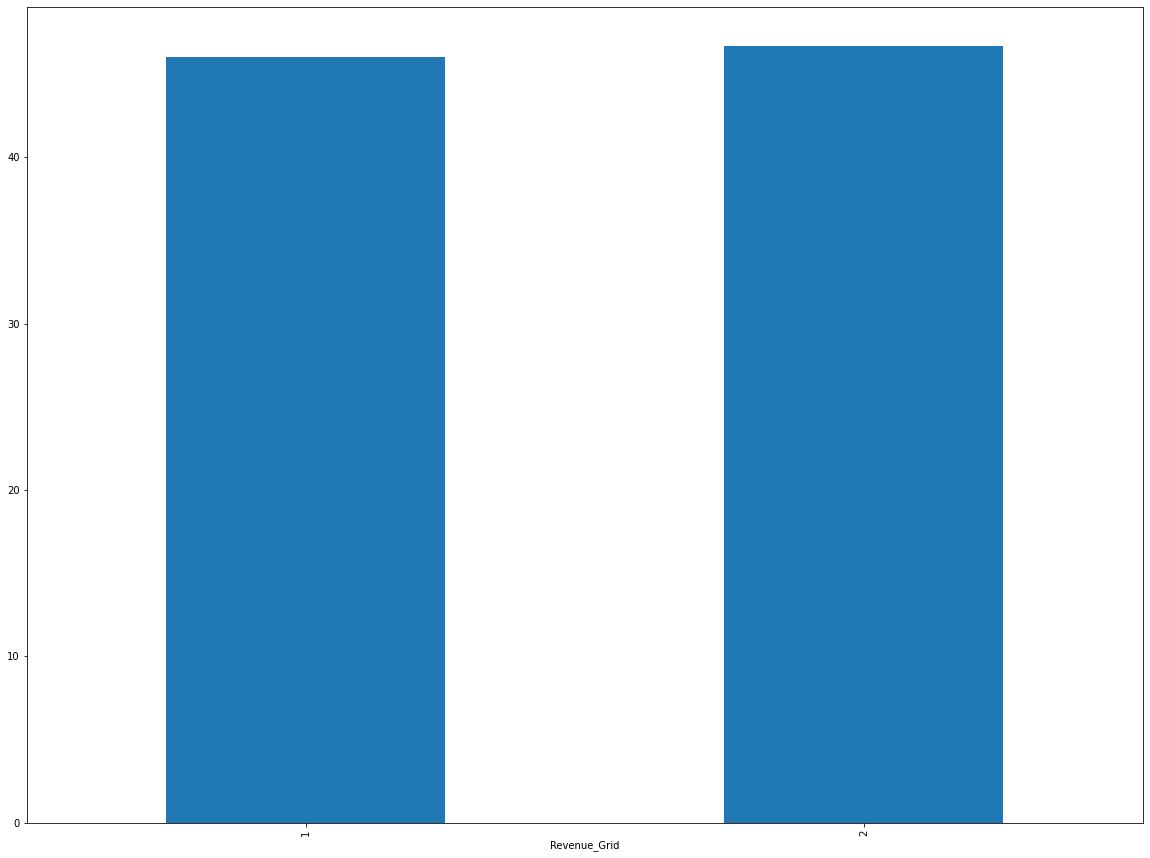

occupation


Revenue_Grid,1,2
occupation,,
Business Manager,71,507
Housewife,93,891
Manual Worker,48,403
Other,47,385
Professional,271,2127
Retired,180,1619
Secretarial/Admin,144,1291
Student,6,41


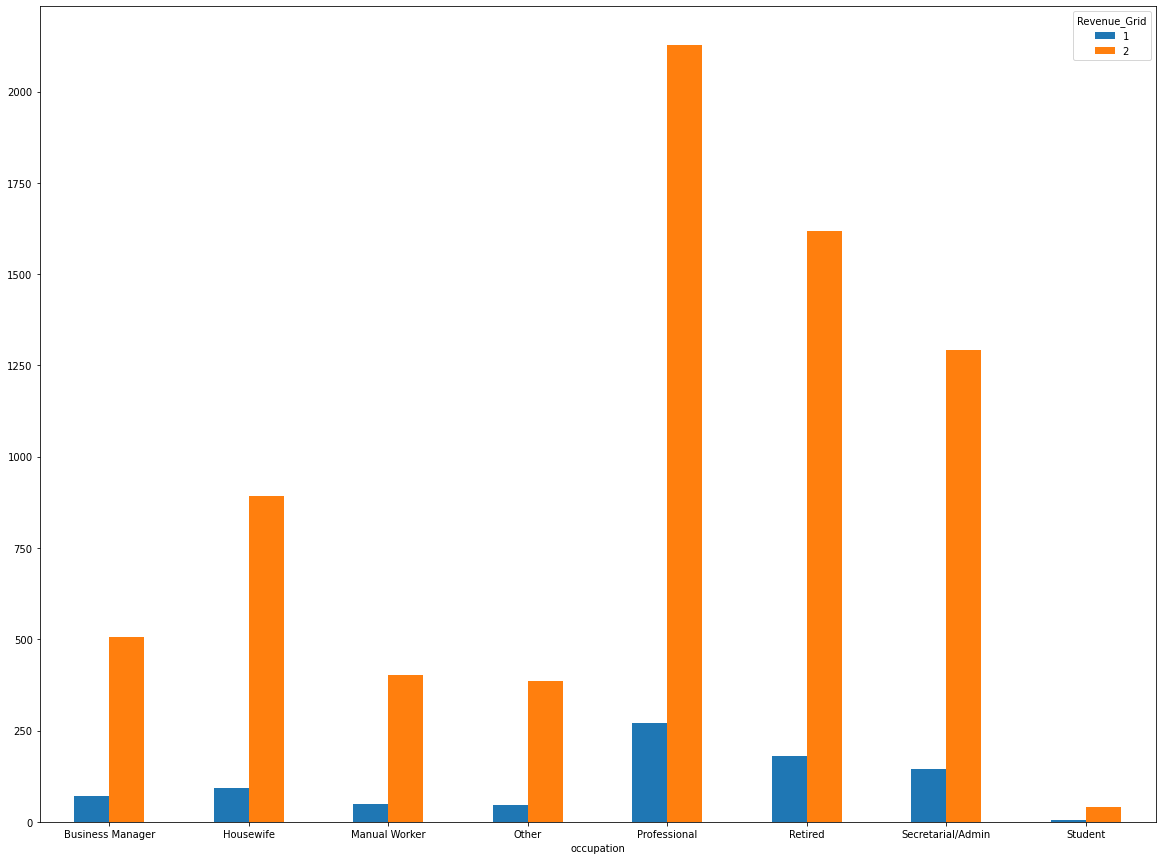

occupation_partner


Revenue_Grid,1,2
occupation_partner,,
Business Manager,62,513
Housewife,42,380
Manual Worker,125,1097
Other,25,236
Professional,395,3167
Retired,150,1408
Secretarial/Admin,60,450
Student,1,13


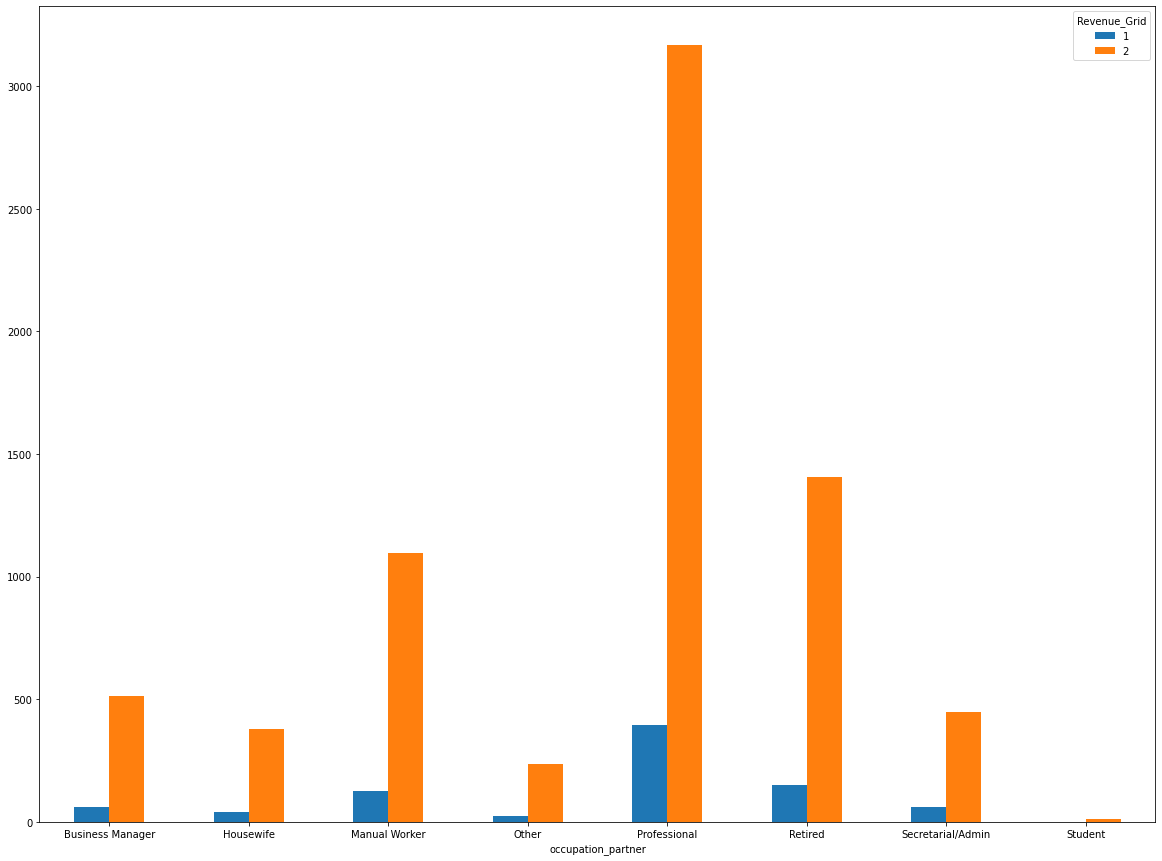

family_income


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,23273.25581,9419.22556,4000.00000,16250.00000,23750.00000,35000.00000,35000.00000
2,7264.00000,22747.28111,9674.02321,4000.00000,13750.00000,23750.00000,28750.00000,35000.00000


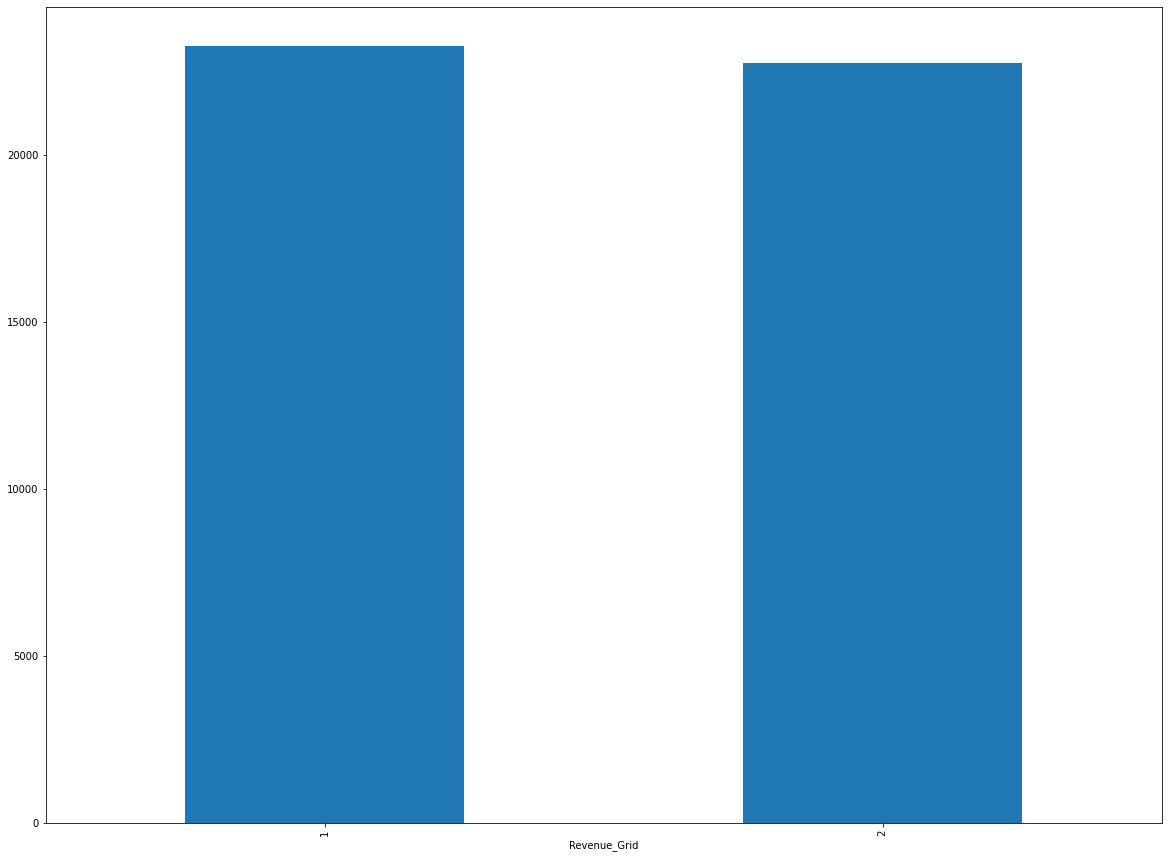

Average_Credit_Card_Transaction


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,61.98070,92.31463,0.00000,0.00000,13.48500,98.96000,592.36000
2,7264.00000,18.66582,41.46433,0.00000,0.00000,0.00000,19.98250,662.26000


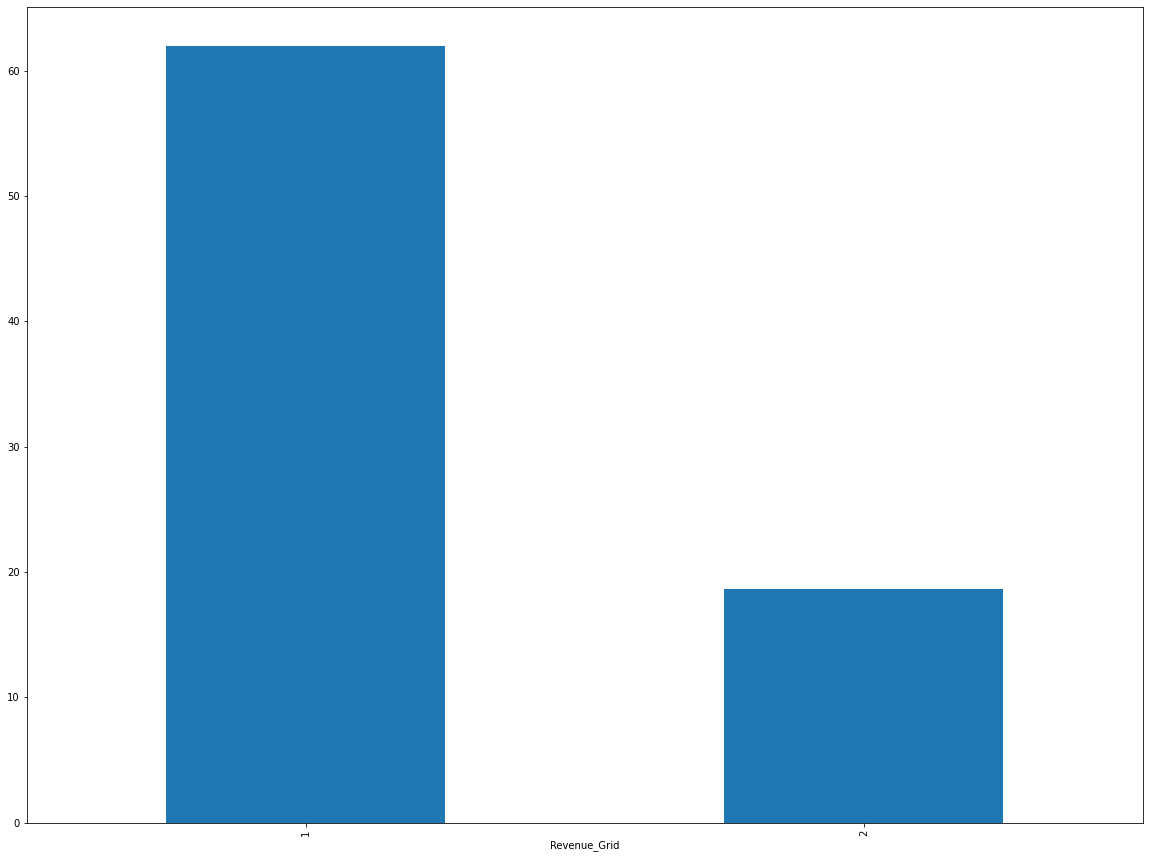

Balance_Transfer


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,61.85990,81.04257,0.00000,0.00000,29.73500,96.95250,583.87000
2,7264.00000,44.21505,78.64609,0.00000,0.00000,14.46500,60.97250,2951.76000


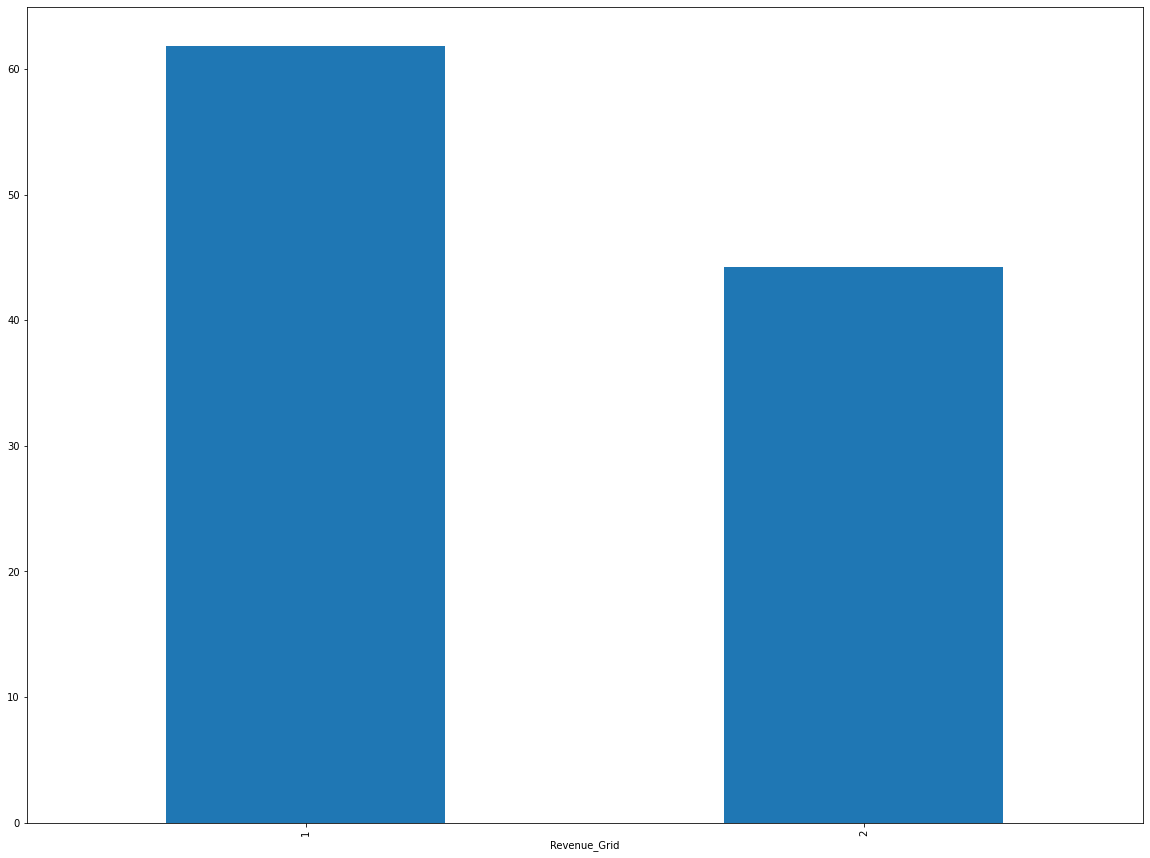

Term_Deposit


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,30.02386,44.97498,0.00000,0.00000,14.49000,44.98000,522.77000
2,7264.00000,26.96035,55.11082,0.00000,0.00000,0.00000,32.98000,784.82000


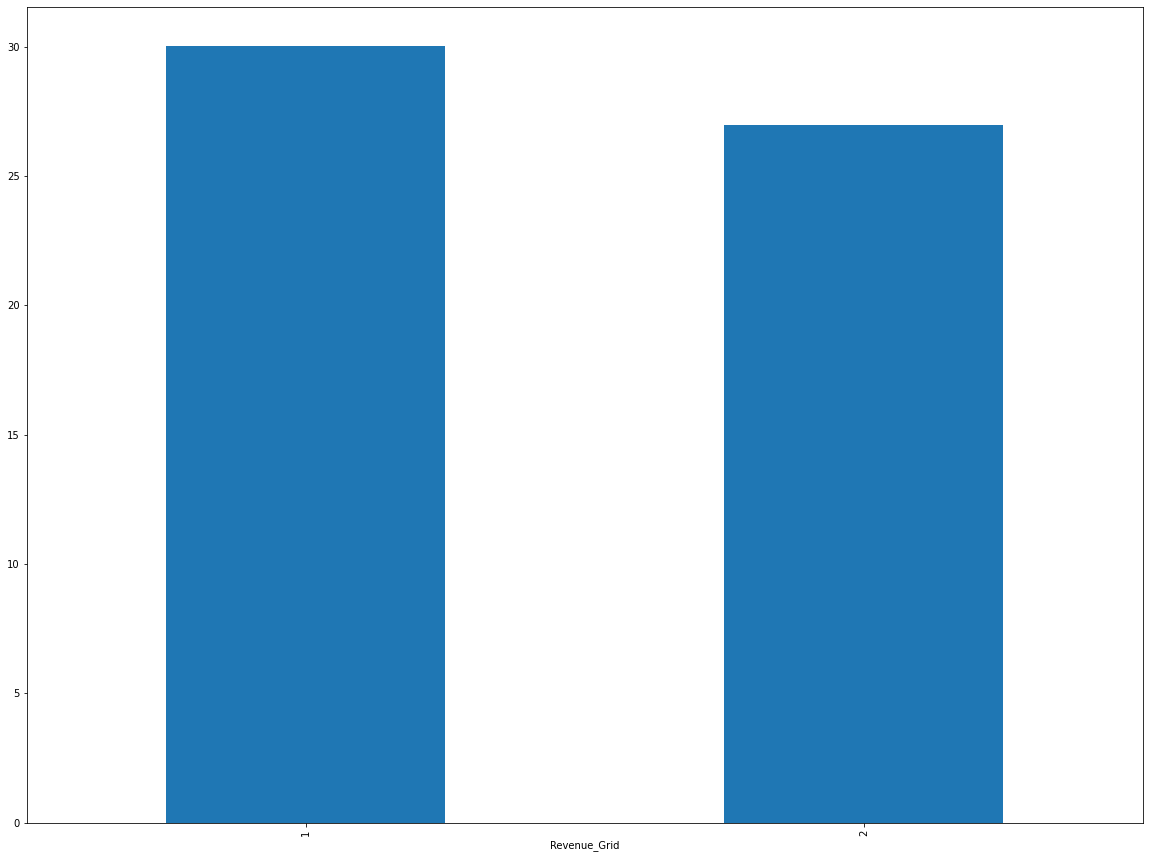

Life_Insurance


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,121.53331,137.39169,0.00000,14.86500,74.94000,188.91250,1005.53000
2,7264.00000,58.66248,87.20825,0.00000,0.00000,28.97000,83.97000,2930.41000


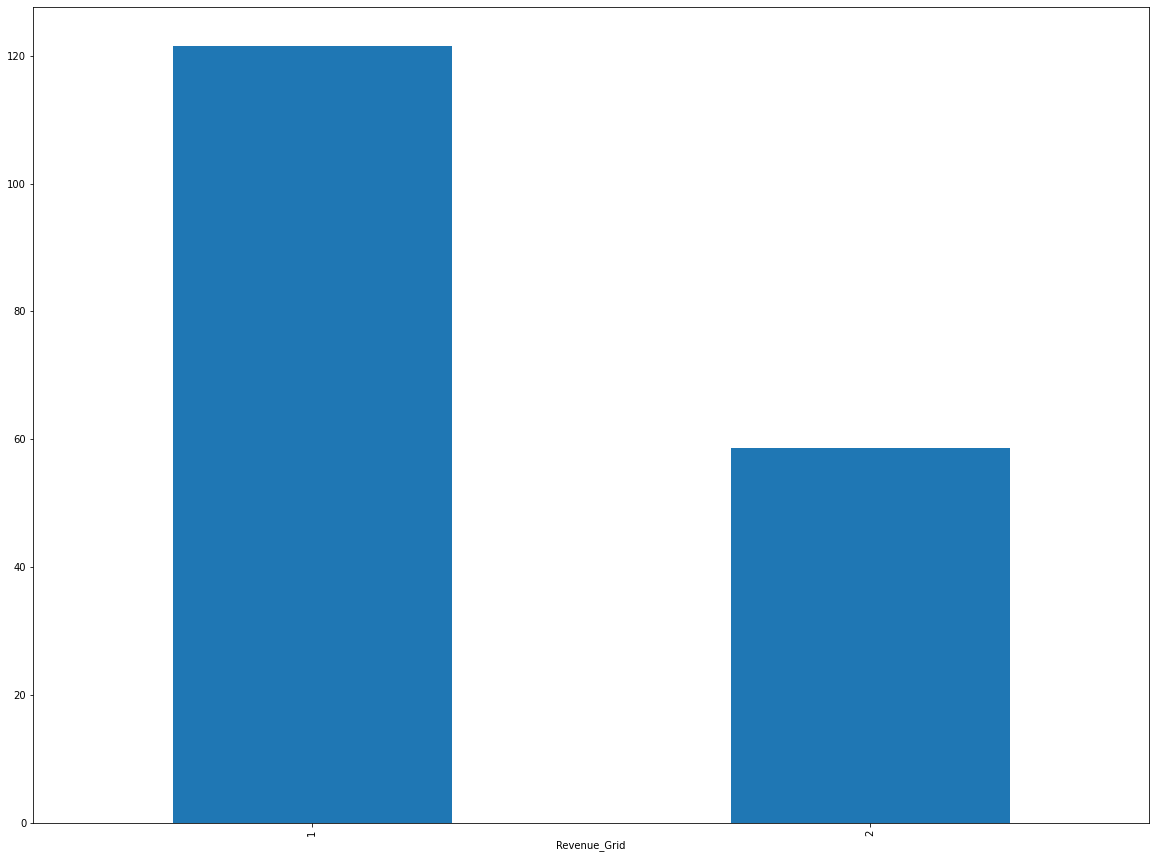

Medical_Insurance


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,28.33857,36.27568,0.00000,0.00000,14.48500,41.96000,244.30000
2,7264.00000,17.70001,31.29267,0.00000,0.00000,0.00000,24.99000,591.04000


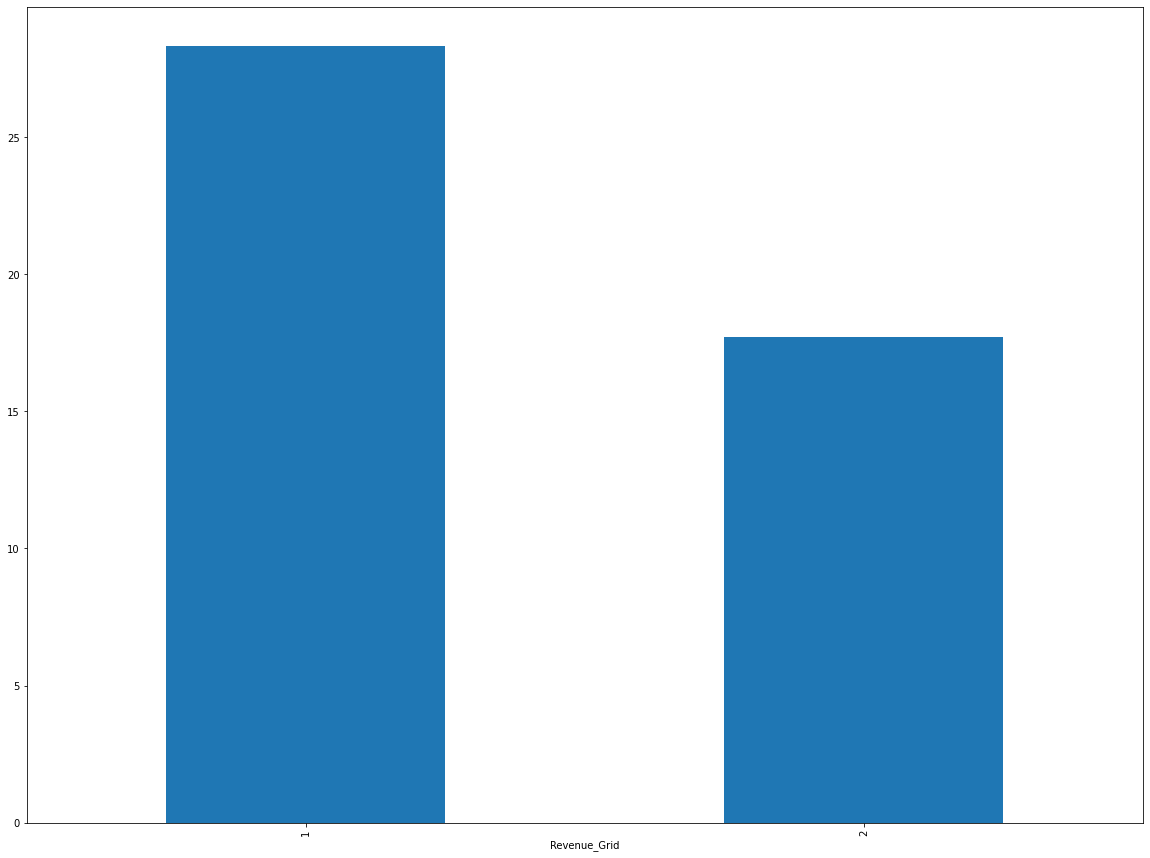

Average_A/C_Balance


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,46.86291,56.74531,0.00000,3.36500,29.49000,68.41250,402.60000
2,7264.00000,30.05920,43.35002,0.00000,0.00000,13.98500,42.98000,626.24000


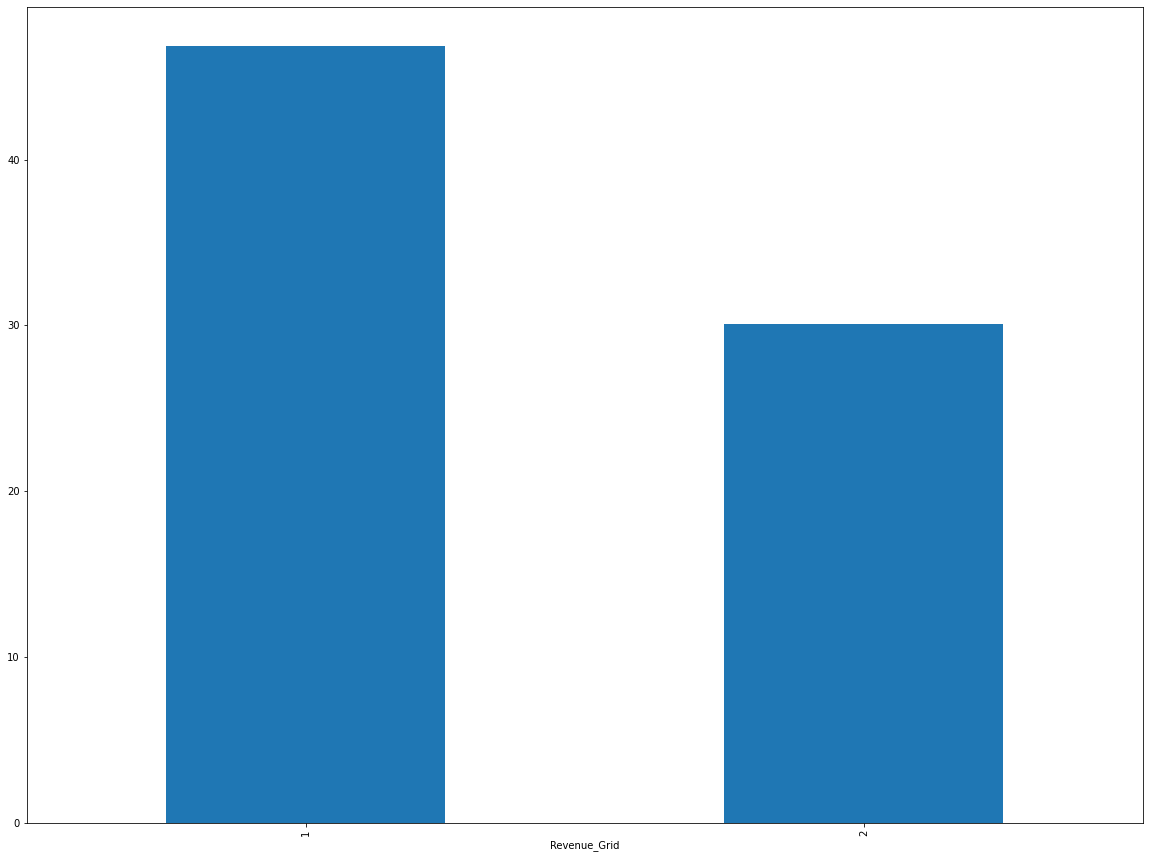

Personal_Loan


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,19.76514,39.49417,0.00000,0.00000,0.00000,24.48000,339.92000
2,7264.00000,26.08483,88.97505,0.00000,0.00000,0.00000,19.99000,4905.93000


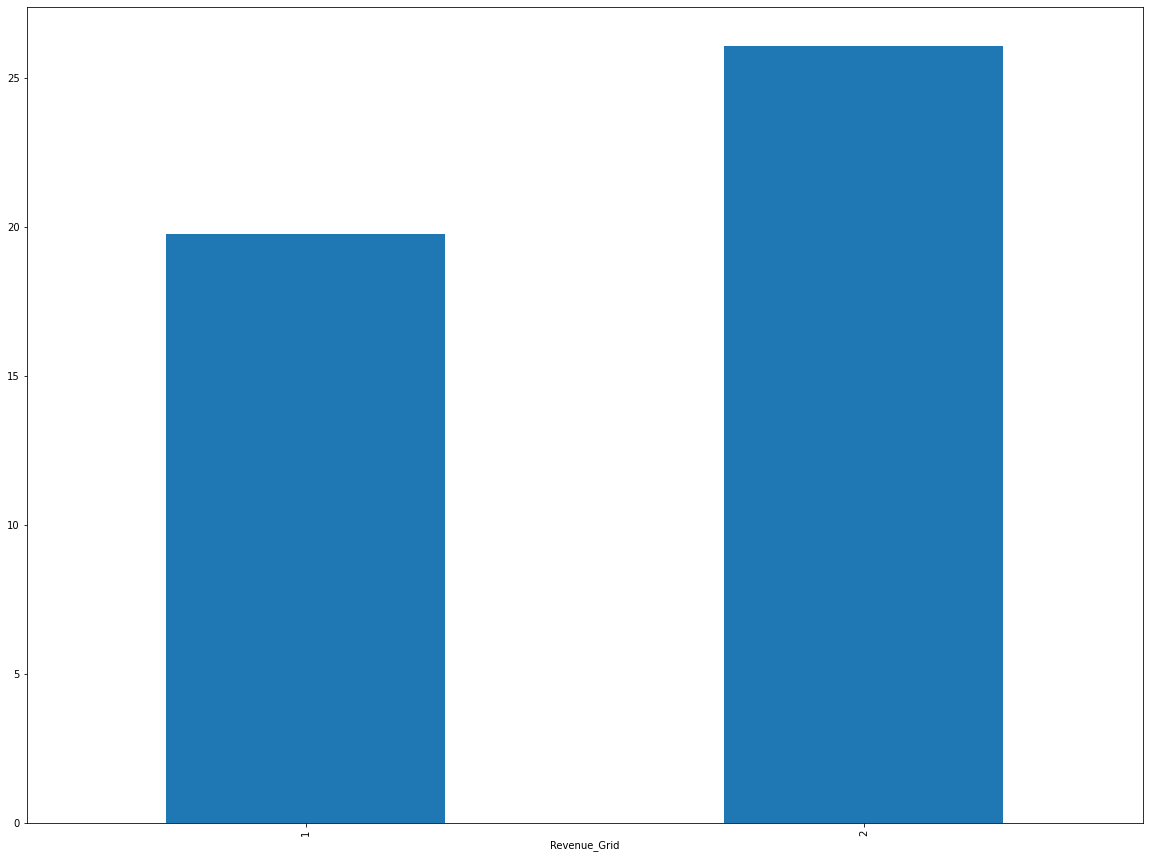

Investment_in_Mutual_Fund


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,62.31945,67.12466,0.00000,10.82500,45.95500,91.91500,587.61000
2,7264.00000,39.28525,63.65282,0.00000,0.00000,21.49000,54.95000,2561.27000


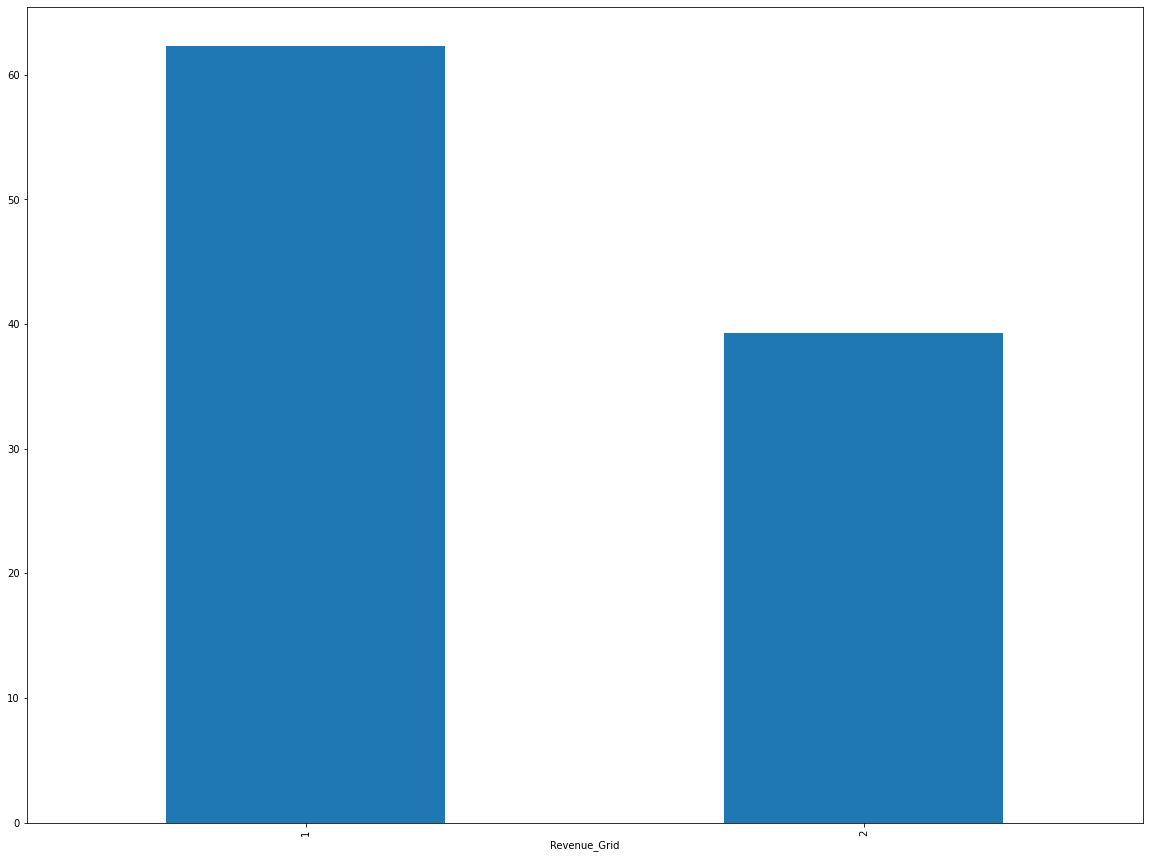

Investment_Tax_Saving_Bond


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,16.56771,22.13918,0.00000,0.00000,4.99000,29.99000,156.87000
2,7264.00000,4.81289,10.34571,0.00000,0.00000,0.00000,4.48000,121.44000


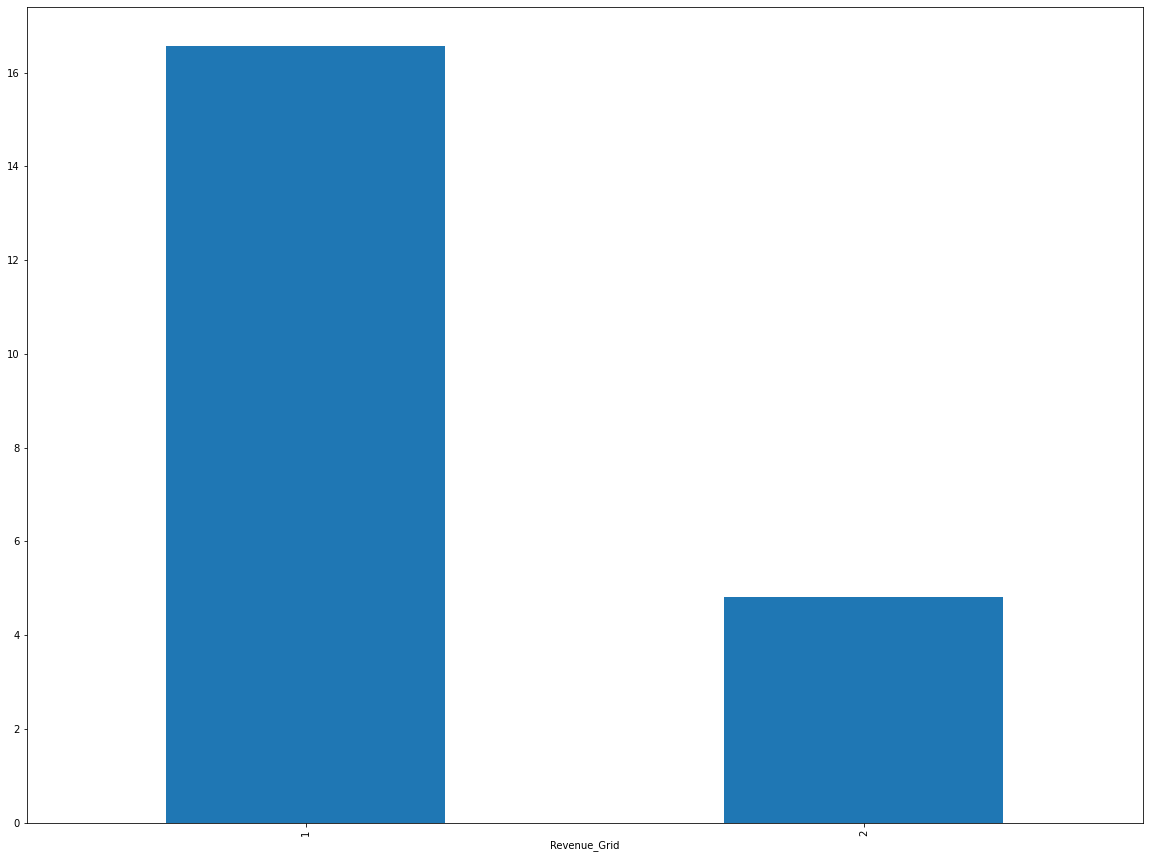

Home_Loan


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,5.31223,10.05319,0.00000,0.00000,0.00000,7.48000,86.37000
2,7264.00000,4.31092,9.92830,0.00000,0.00000,0.00000,4.23000,162.35000


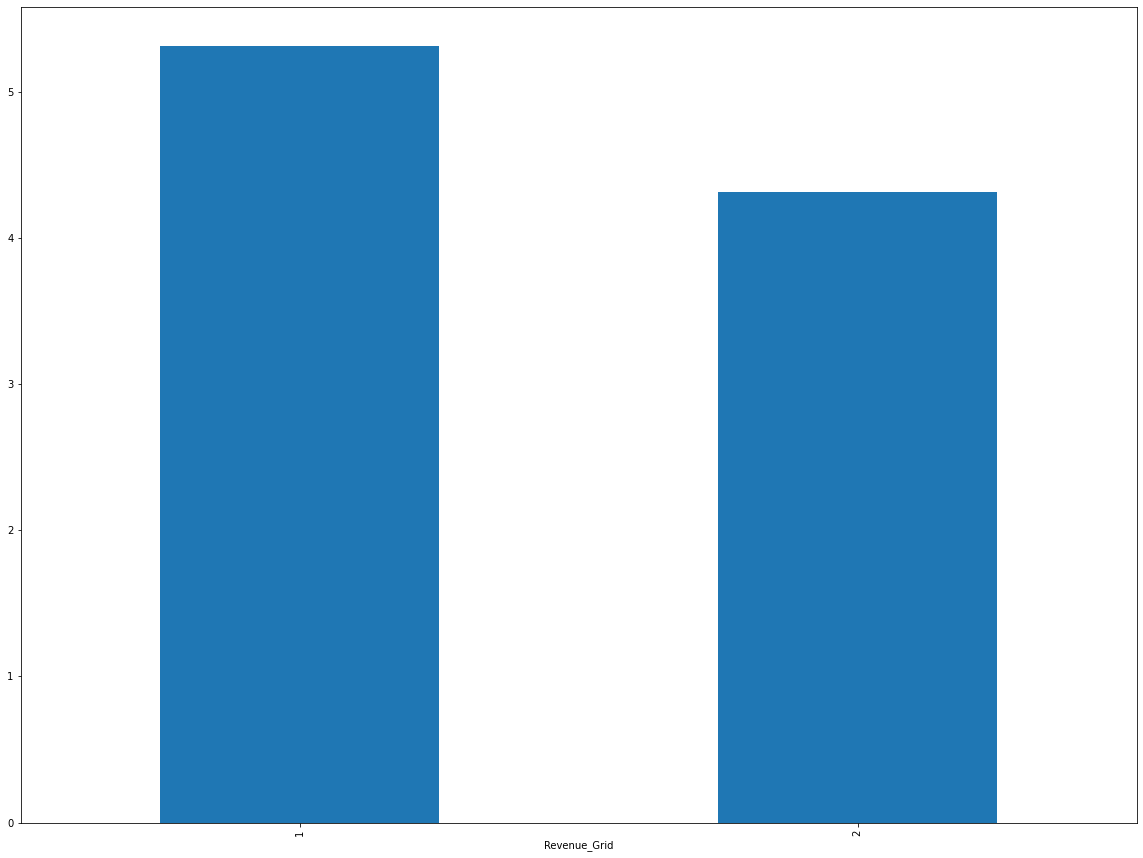

Online_Purchase_Amount


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,121.73355,255.70810,0.00000,0.00000,61.21500,149.90750,4306.42000
2,7264.00000,7.05934,20.28229,0.00000,0.00000,0.00000,0.02750,512.81000


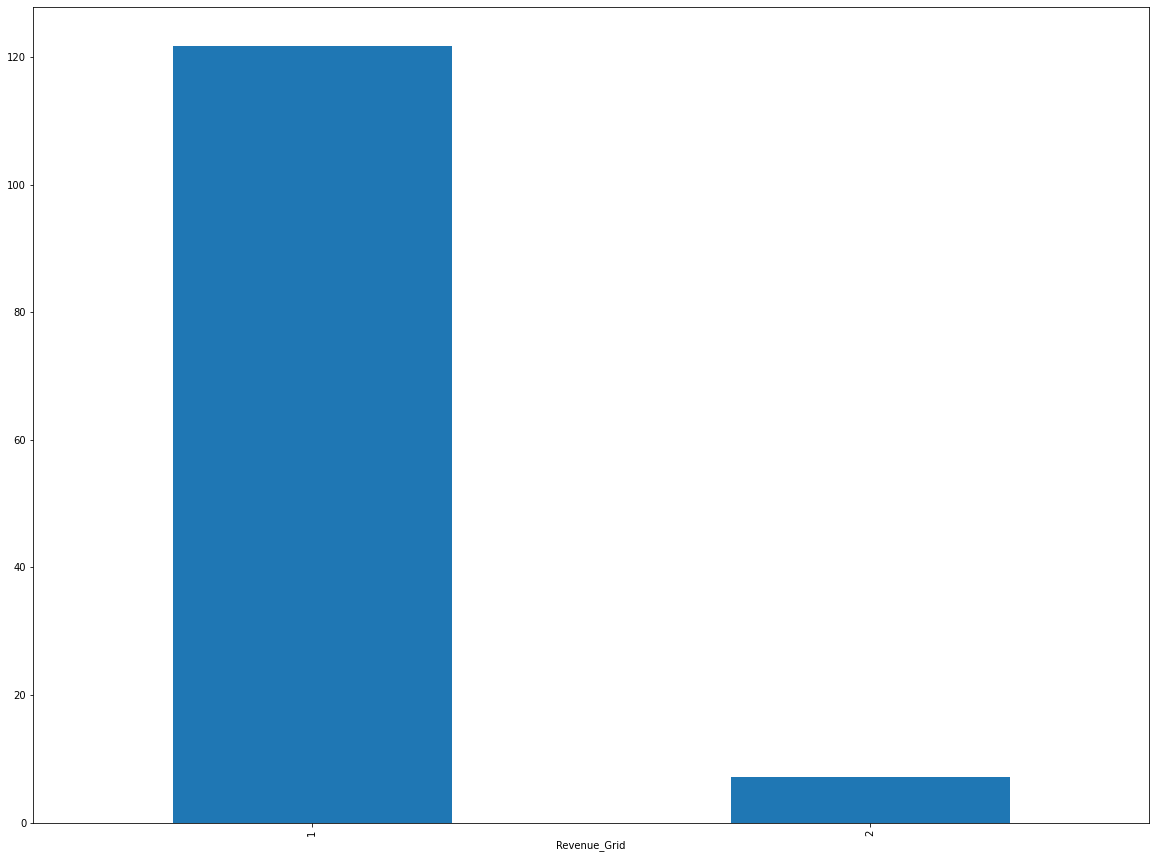

gender


Revenue_Grid,1,2
gender,,
Female,631,5475
Male,222,1765
Unknown,7,24


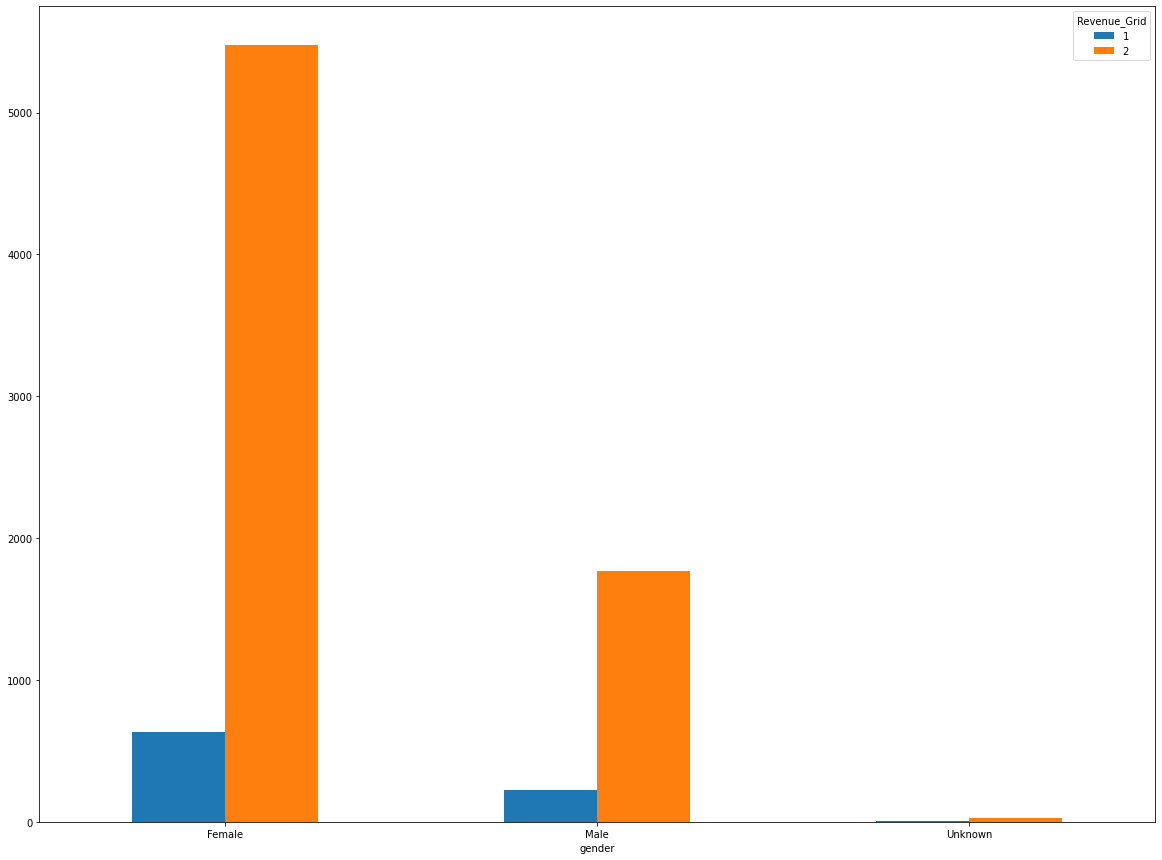

Investment_in_Commudity


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,60.74735,48.32801,0.00000,25.18750,51.18000,83.55000,373.30000
2,7264.00000,33.24094,40.76037,0.00000,7.50000,21.29000,45.59250,1231.09000


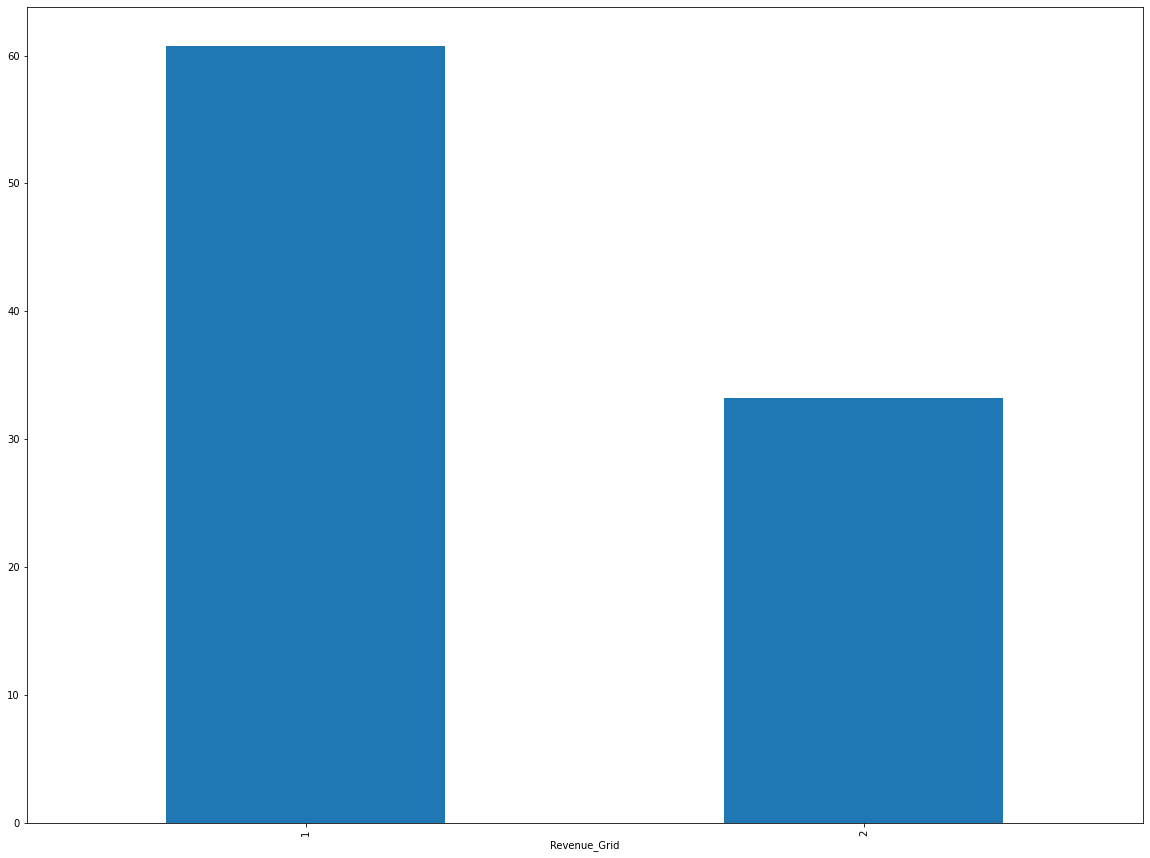

Investment_in_Equity


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,45.42765,51.28485,0.00000,17.24000,33.47000,56.72000,717.74000
2,7264.00000,18.60282,27.87121,0.00000,4.16000,11.34500,24.40000,1279.10000


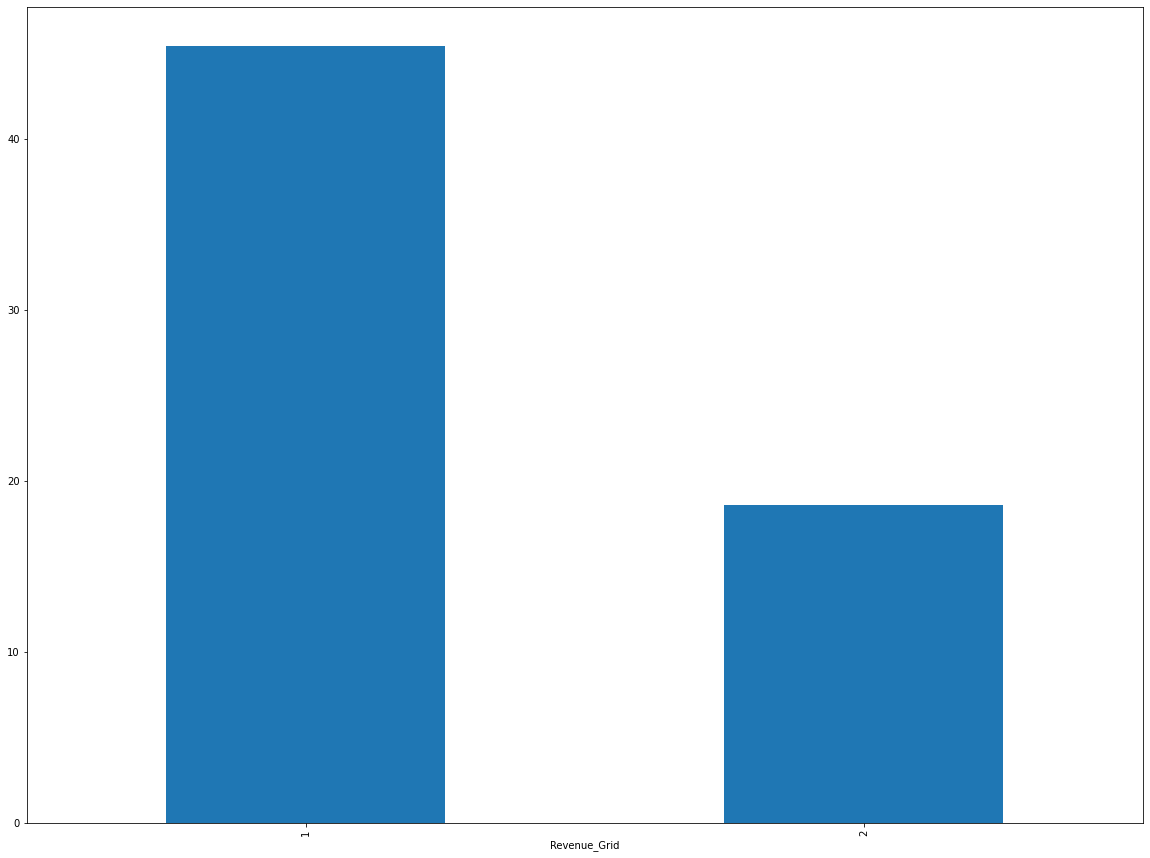

Investment_in_Derivative


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,49.23209,39.31544,0.00000,20.49250,40.79500,68.51500,244.00000
2,7264.00000,29.43494,38.97412,0.00000,8.16000,19.32000,39.16000,1771.16000


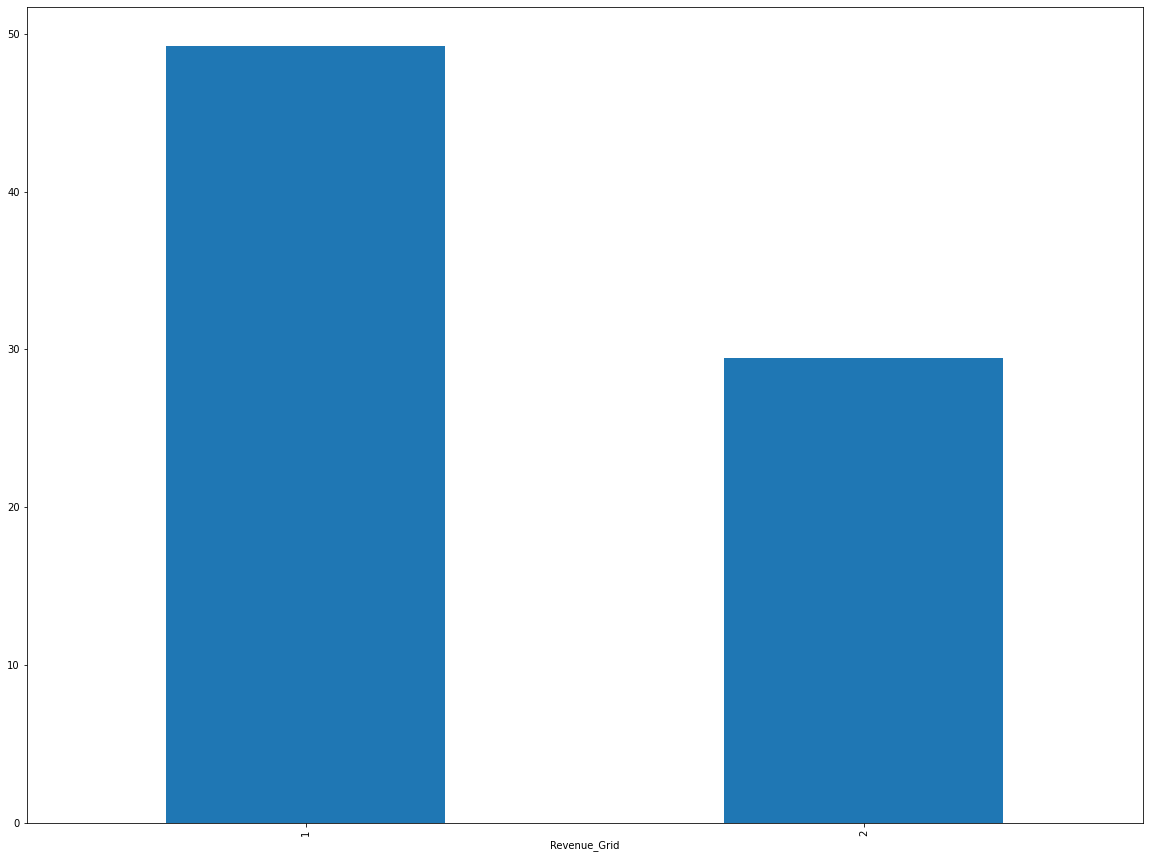

Portfolio_Balance


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,155.50267,117.15668,-64.30000,75.49250,130.10000,208.06000,790.83000
2,7264.00000,81.52181,104.47839,-78.43000,22.96750,59.24500,112.84750,4283.56000


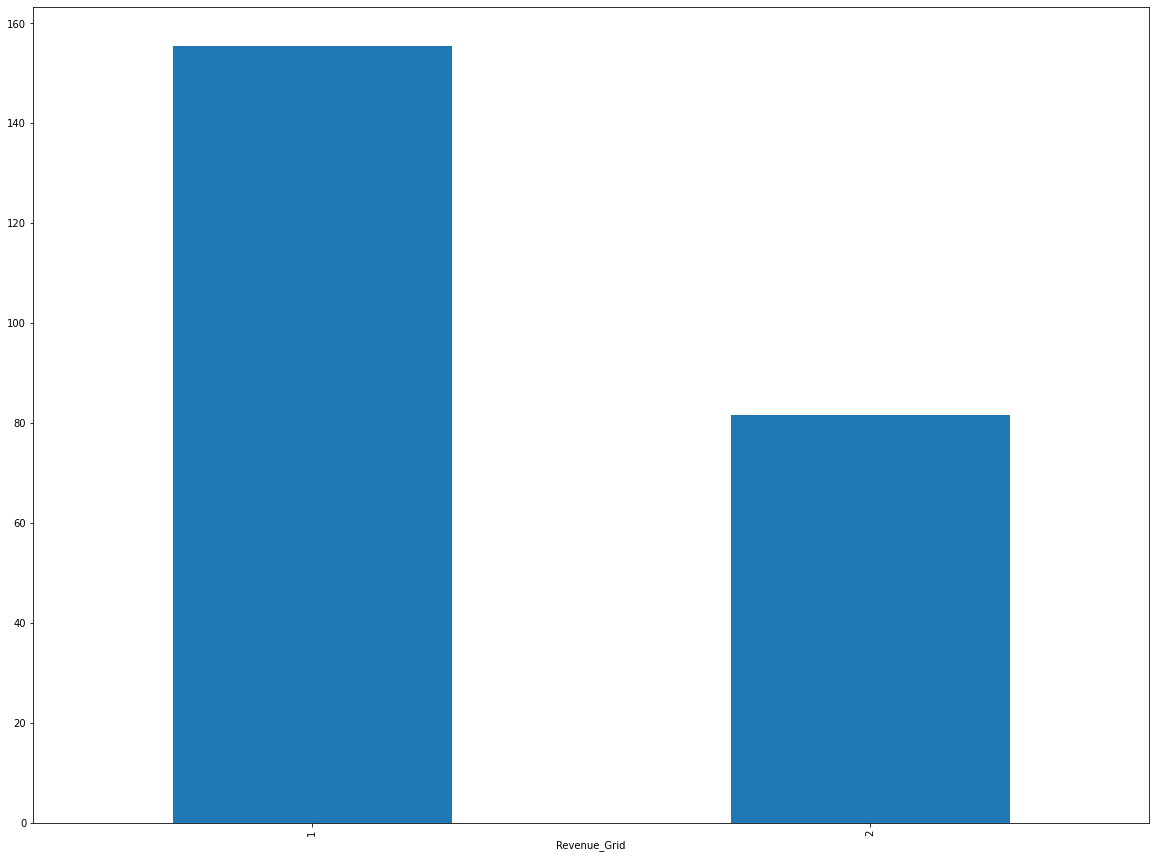

Revenue_Grid


,count,mean,std,min,25%,50%,75%,max
Revenue_Grid,,,,,,,,
1,860.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
2,7264.00000,2.00000,0.00000,2.00000,2.00000,2.00000,2.00000,2.00000


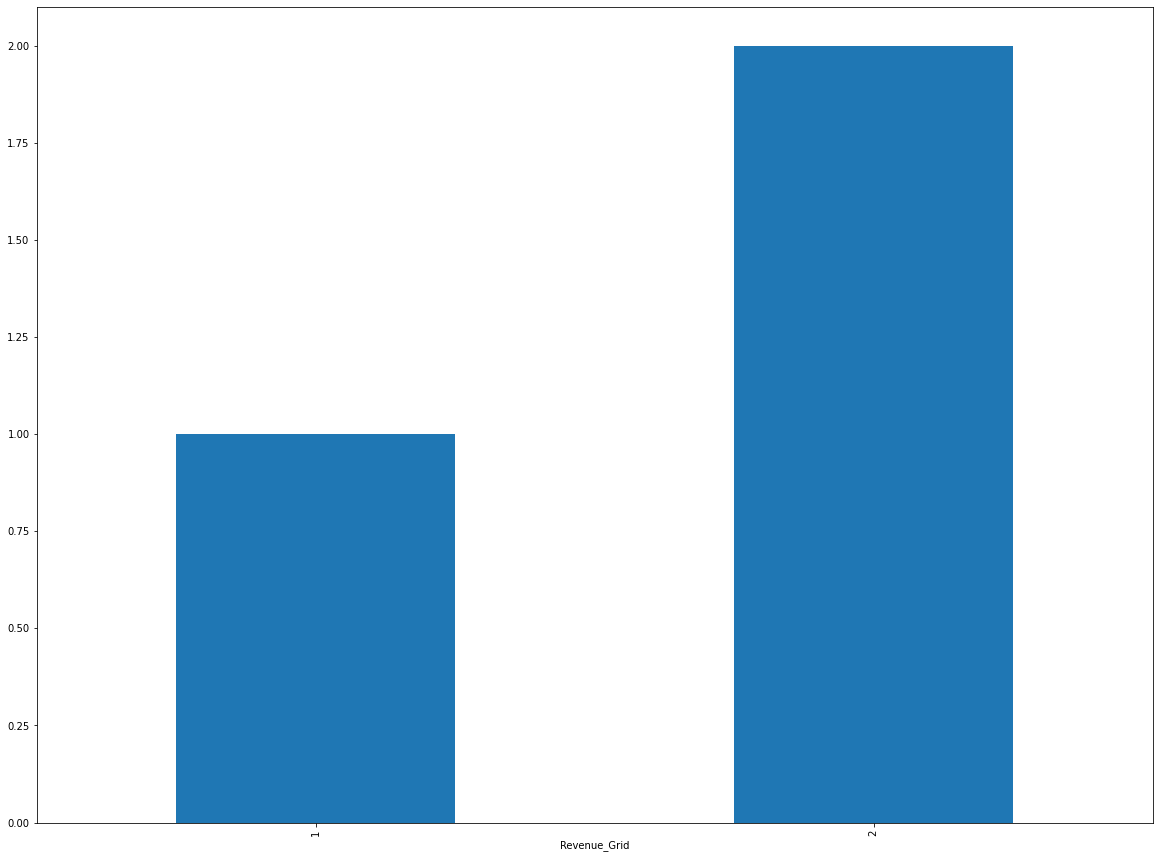

In [23]:
for column in data_customer :
  print(column)
  get_charts(column,data_customer)

### **Exploratory data Analyis ** 
There 860 values for grid 1,7264 for grid 2

## **Comparing the target variable with each column**
# **Relation between net worth to children **
More number of net worth 2 have no children





In [24]:
data_customer.columns

Index(['age_band', 'occupation', 'occupation_partner', 'family_income',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [25]:
data_customer['net_investment']=data_customer['Investment_in_Commudity']+data_customer['Investment_in_Derivative']+data_customer['Investment_in_Equity']+data_customer['Investment_in_Mutual_Fund']+data_customer['Investment_Tax_Saving_Bond']
print(data_customer.columns)


Index(['age_band', 'occupation', 'occupation_partner', 'family_income',
       'Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid',
       'net_investment'],
      dtype='object')


In [26]:
#delete rows with all zero investments
index = data_customer[(data_customer['net_investment'] == 0)].index
data_customer.drop(index, inplace = True)

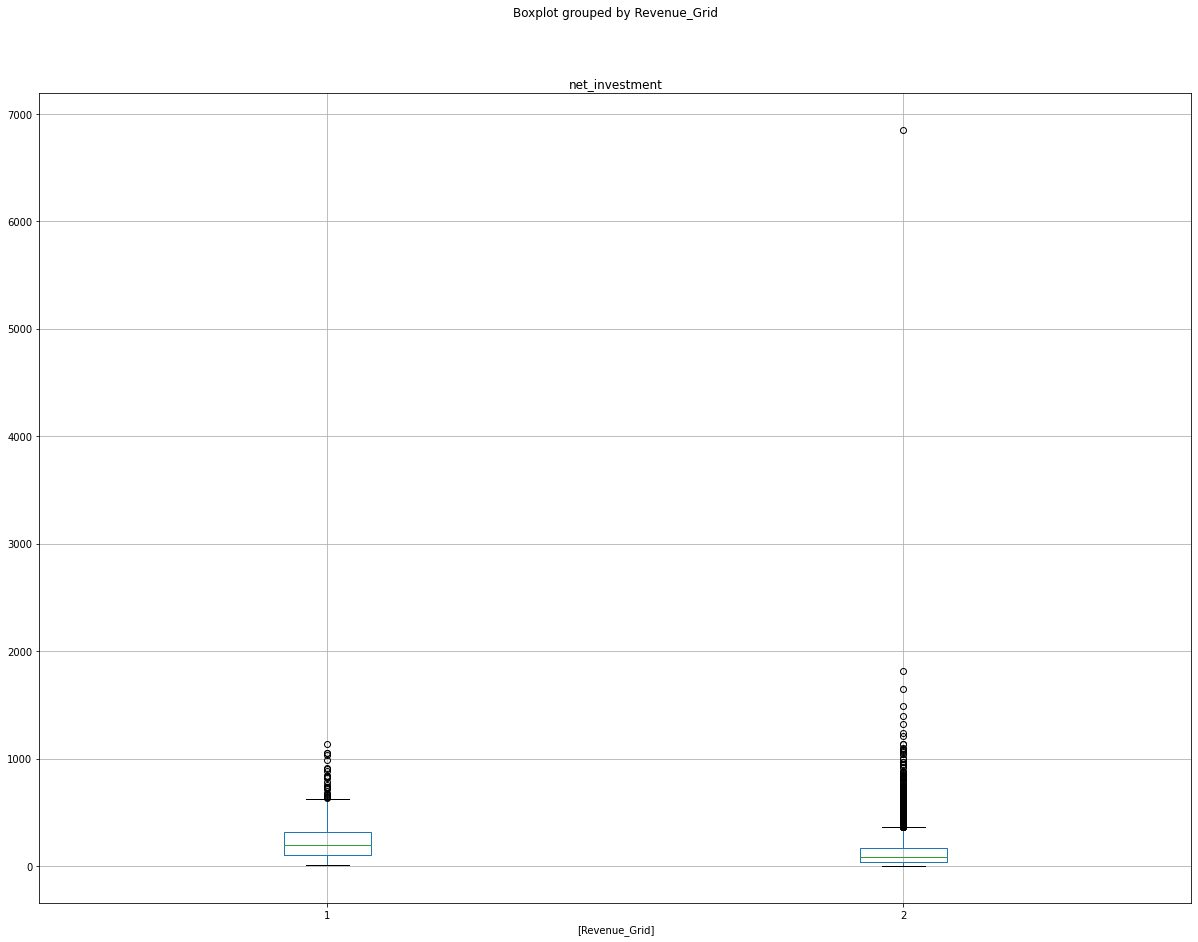

In [27]:
#find outliers in grid 2 net invest
data_customer.boxplot(column='net_investment',by=['Revenue_Grid'])
plt.show()

In [28]:
#function to give zeros in columns for each grid
def findzeros(col_list):
  df = data_customer.groupby('Revenue_Grid')[col_list].agg(lambda x: x.eq(0).sum())
  print(df)

In [29]:
def drawboxplot(col_list):
  data_customer.boxplot(column=col_list,by=['Revenue_Grid'])
plt.show()


In [30]:

mylist=['Investment_in_Commudity','Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond',
        'Investment_in_Equity',
       'Investment_in_Derivative','net_investment']


Revenue_Grid
1    40.00000
2   615.00000
Name: Investment_in_Commudity, dtype: float64
Revenue_Grid
1    361.00000
2   4460.00000
Name: Average_Credit_Card_Transaction, dtype: float64
Revenue_Grid
1    296.00000
2   3067.00000
Name: Balance_Transfer, dtype: float64
Revenue_Grid
1    382.00000
2   4036.00000
Name: Term_Deposit, dtype: float64
Revenue_Grid
1    300.00000
2   3577.00000
Name: Medical_Insurance, dtype: float64
Revenue_Grid
1    195.00000
2   2444.00000
Name: Average_A/C_Balance, dtype: float64
Revenue_Grid
1    492.00000
2   4472.00000
Name: Personal_Loan, dtype: float64
Revenue_Grid
1    183.00000
2   2249.00000
Name: Investment_in_Mutual_Fund, dtype: float64
Revenue_Grid
1    328.00000
2   4635.00000
Name: Investment_Tax_Saving_Bond, dtype: float64
Revenue_Grid
1    27.00000
2   718.00000
Name: Investment_in_Equity, dtype: float64
Revenue_Grid
1    20.00000
2   255.00000
Name: Investment_in_Derivative, dtype: float64
Revenue_Grid
1   0.00000
2   0.00000
Name: net_investm

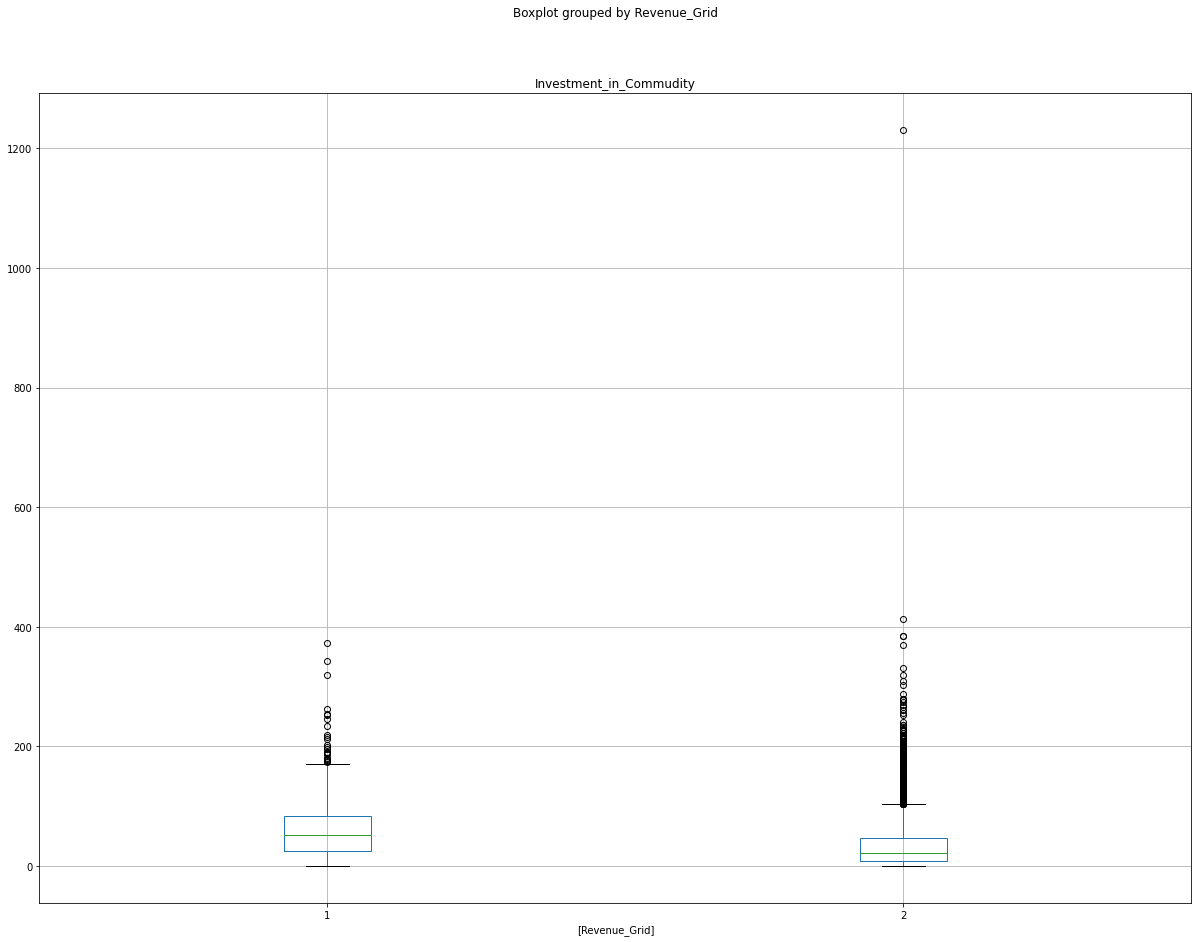

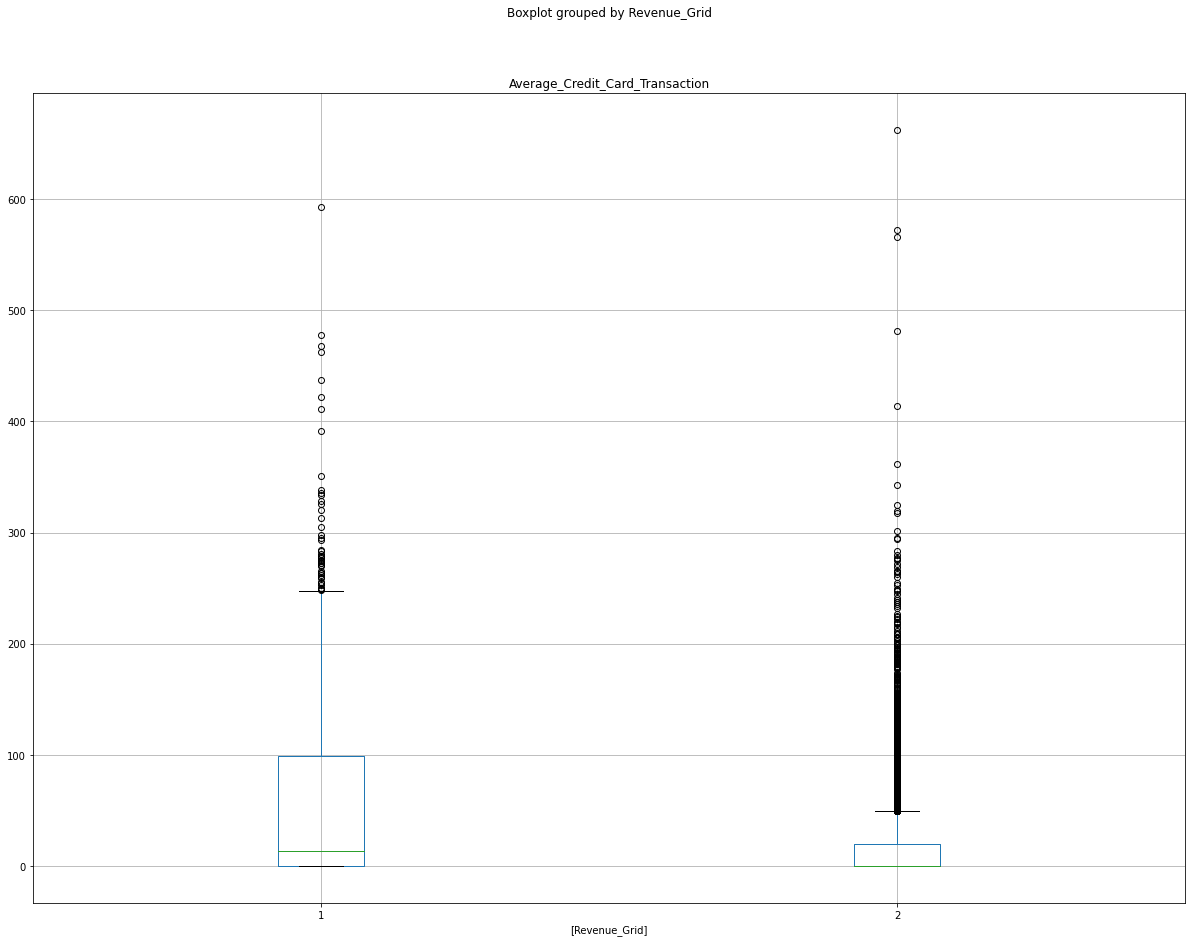

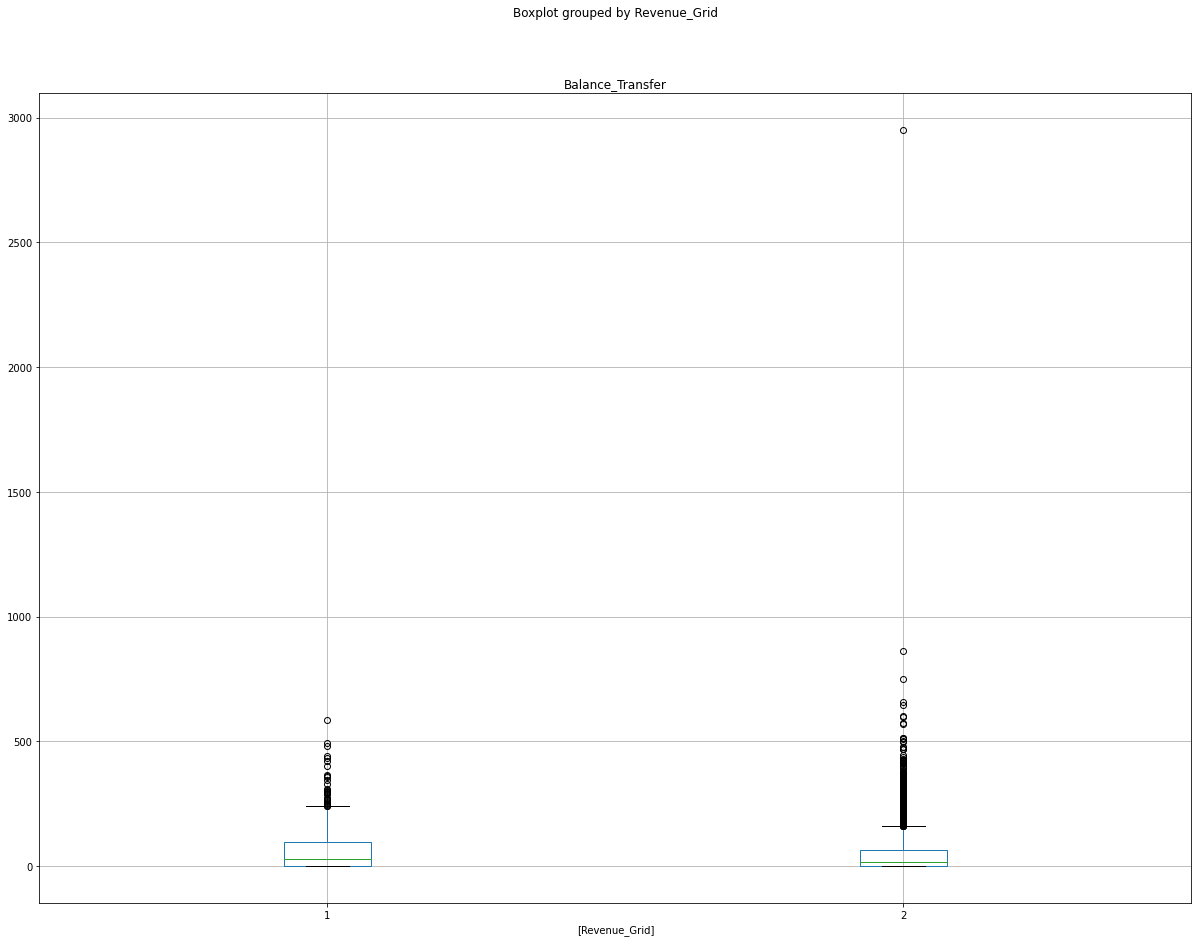

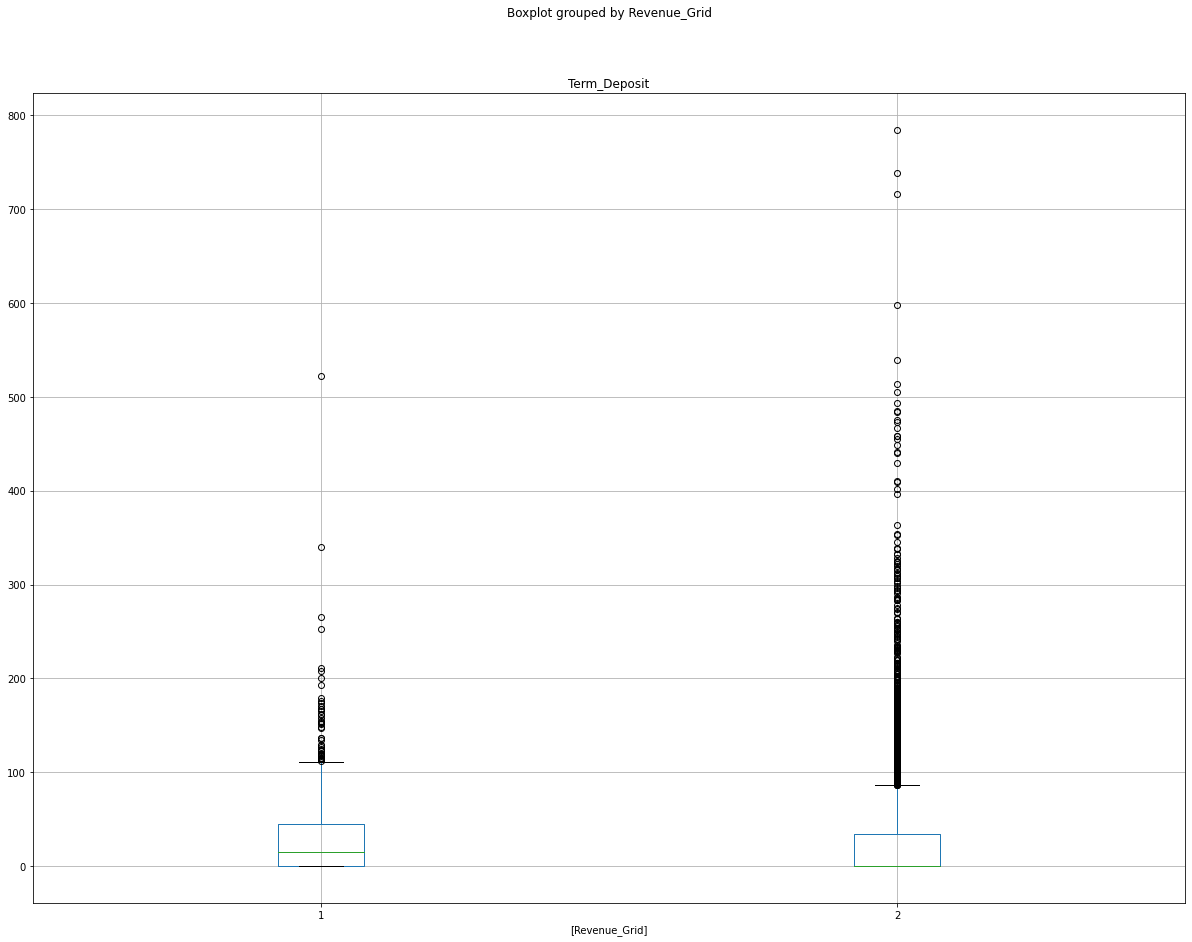

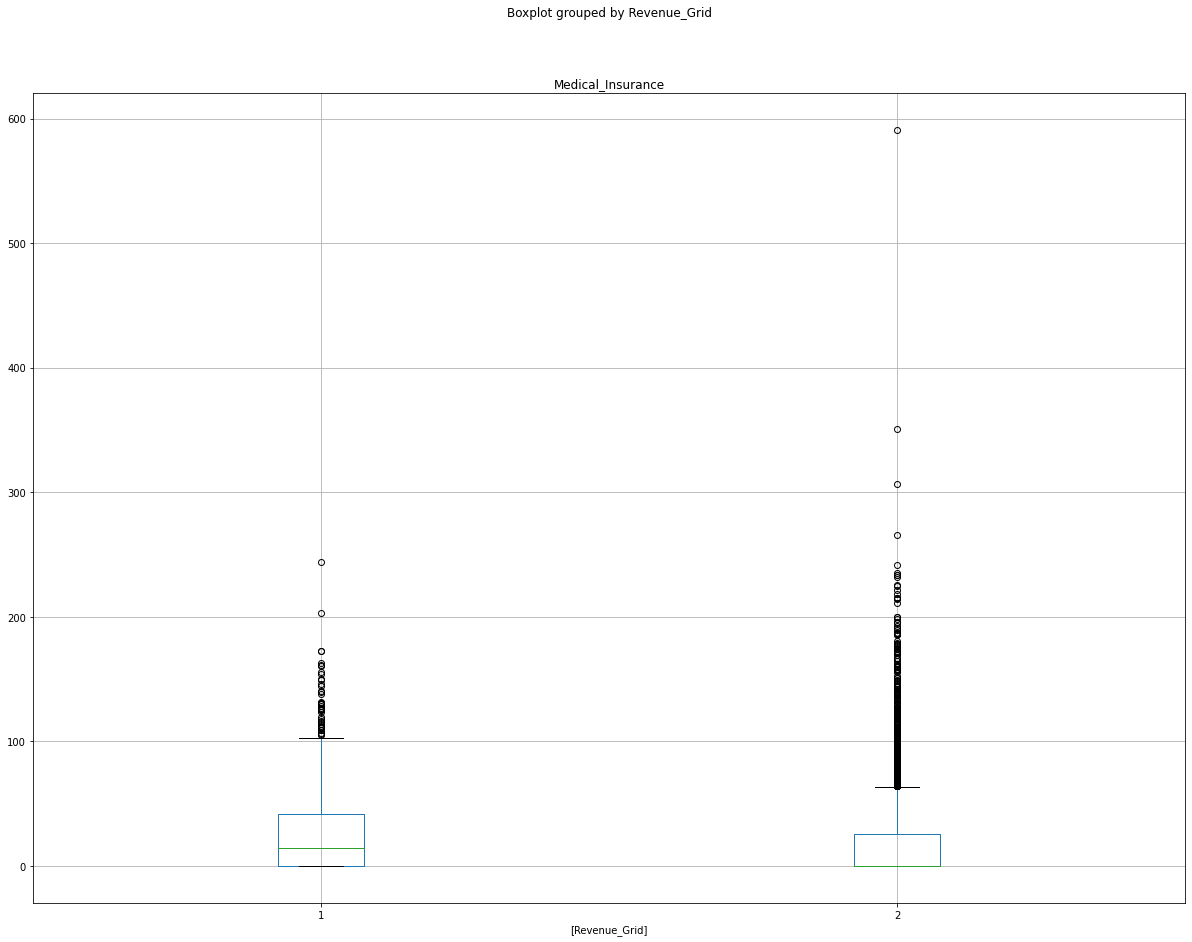

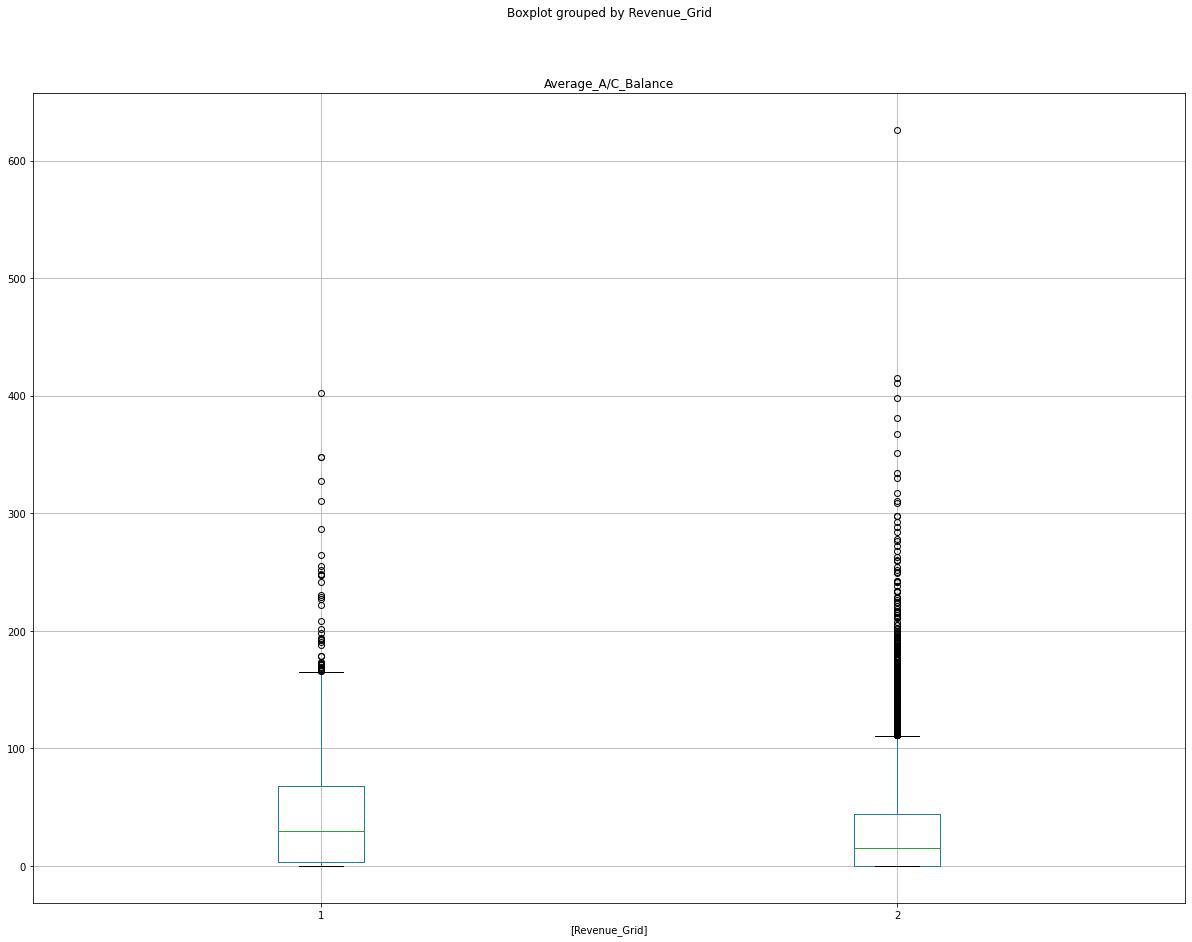

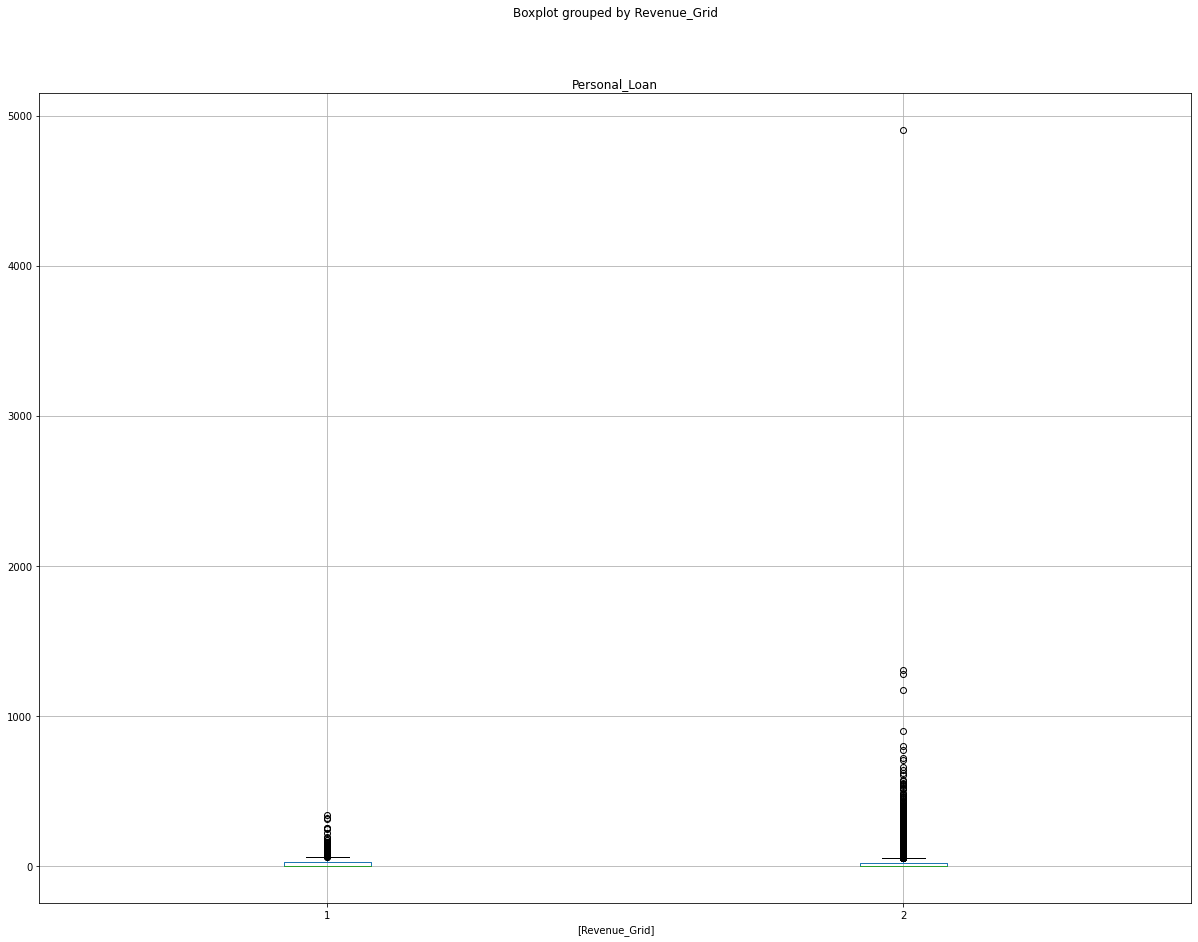

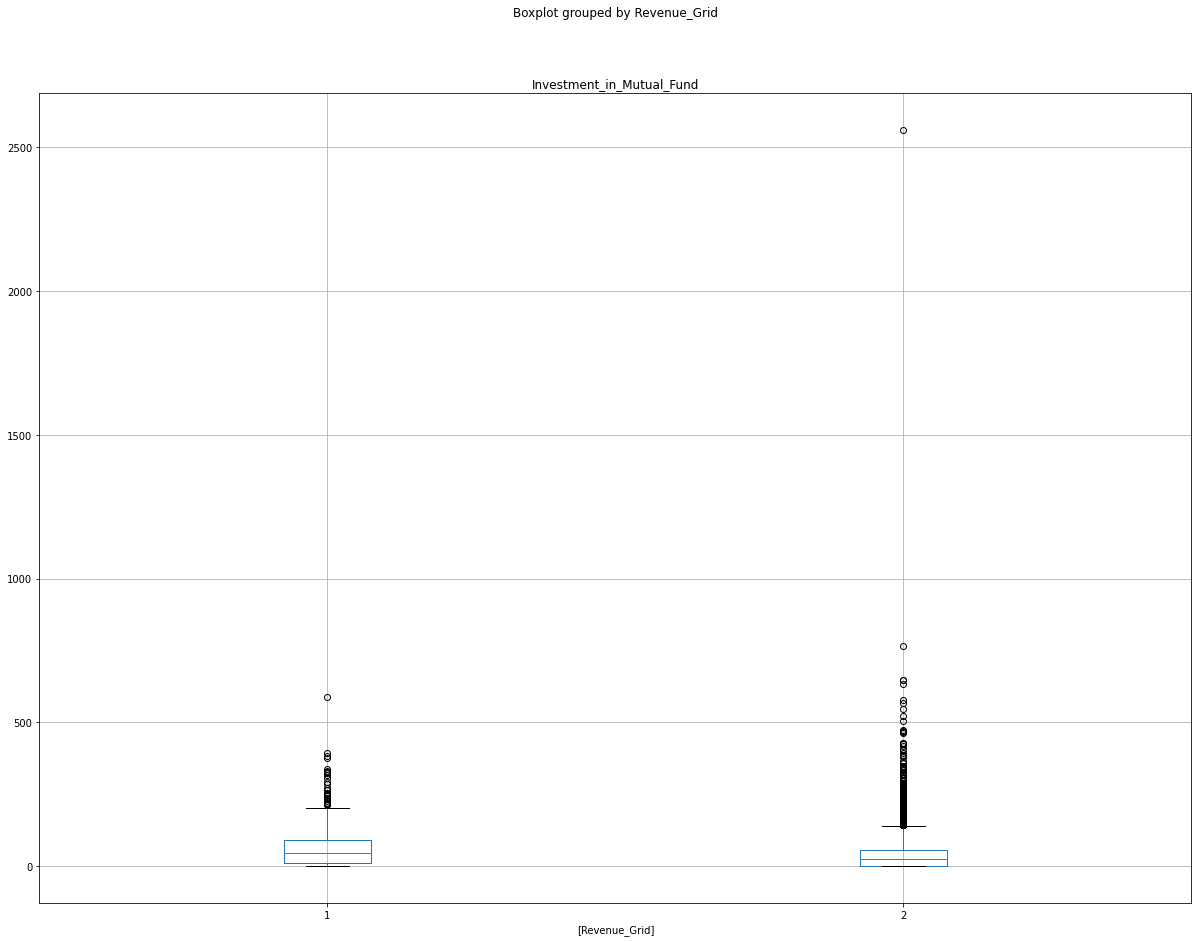

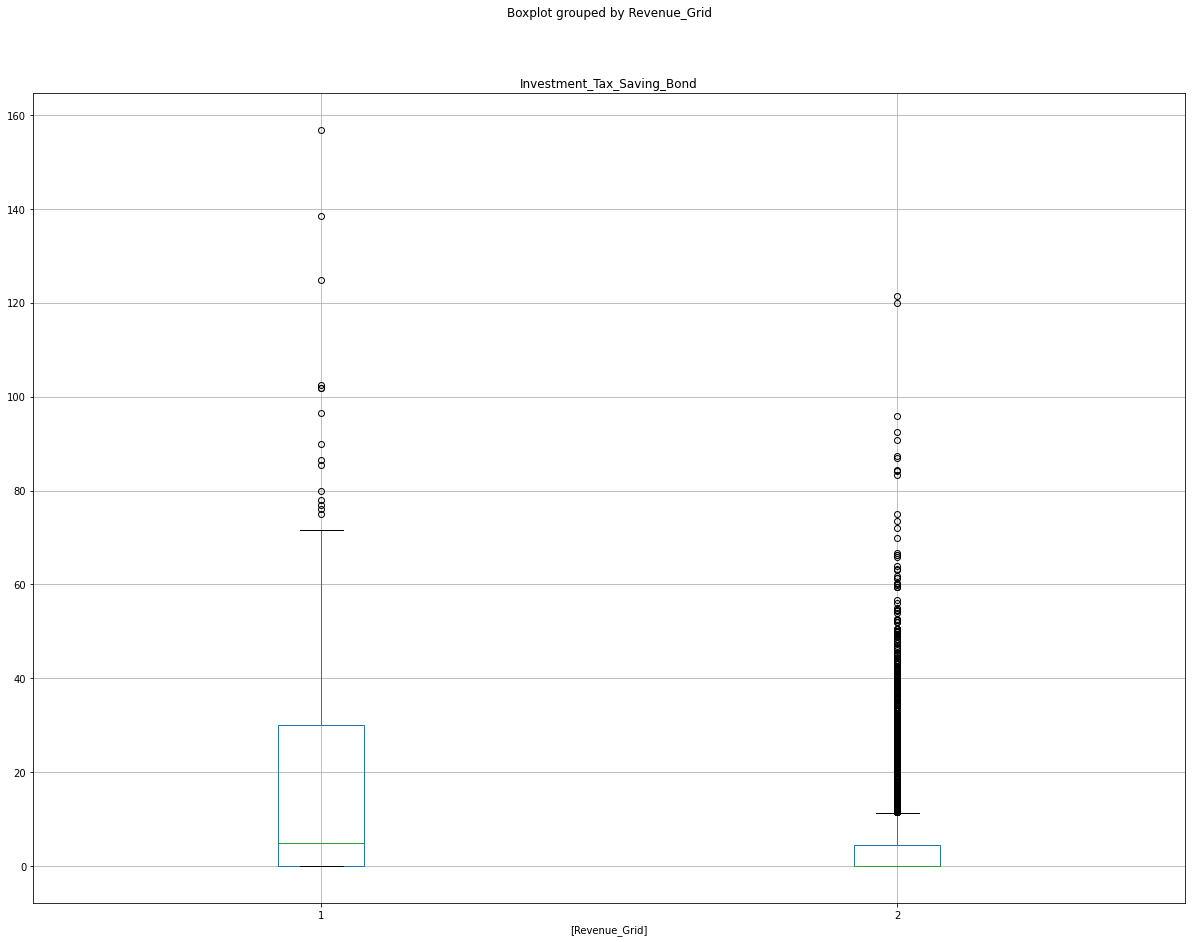

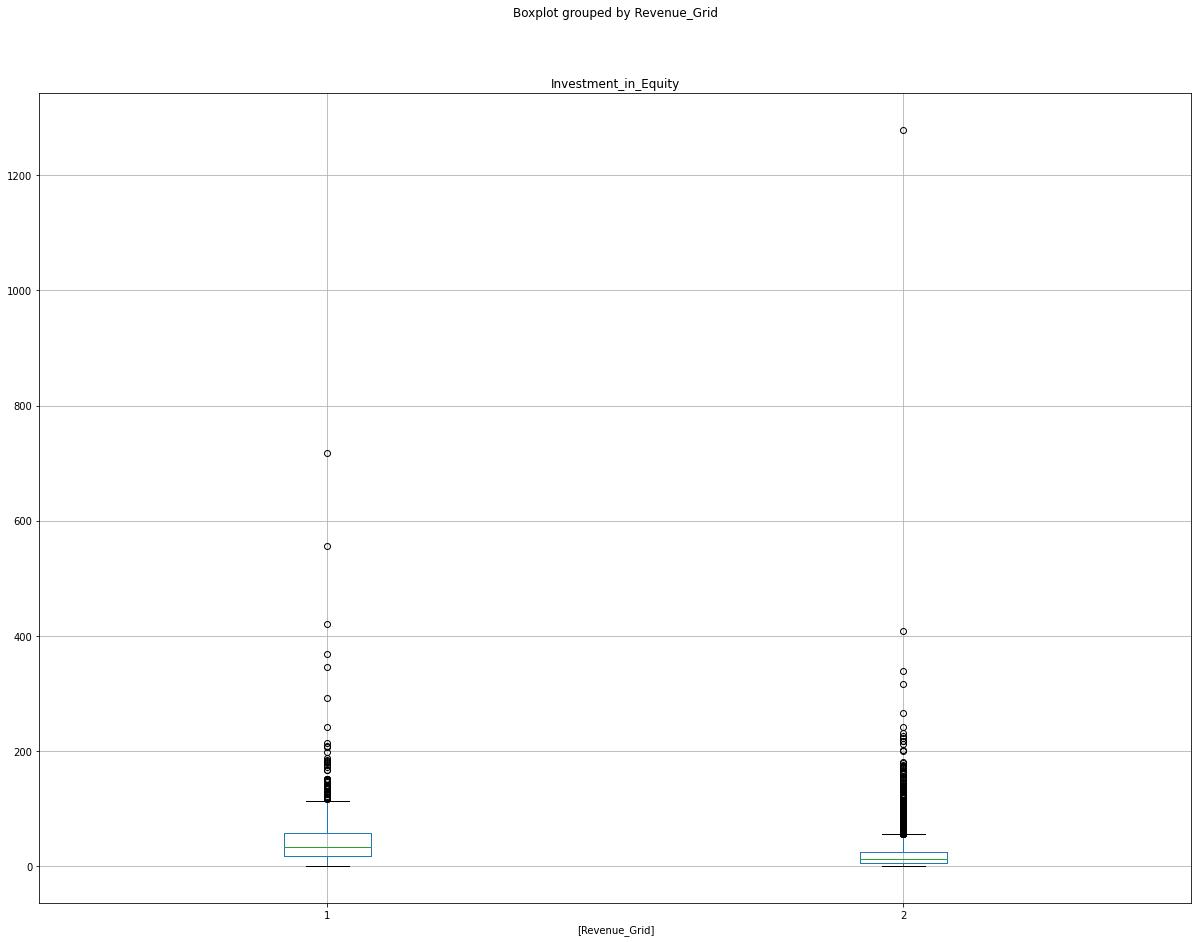

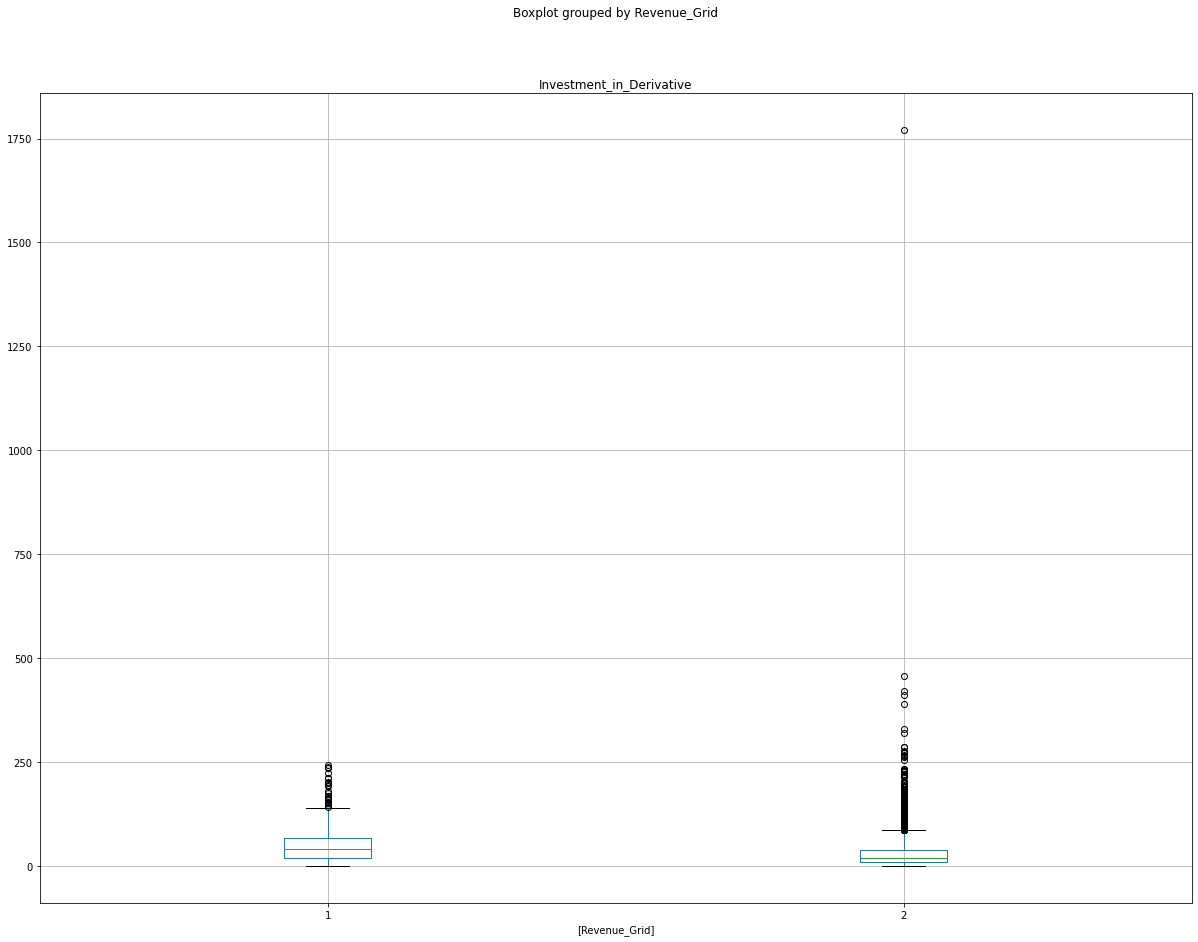

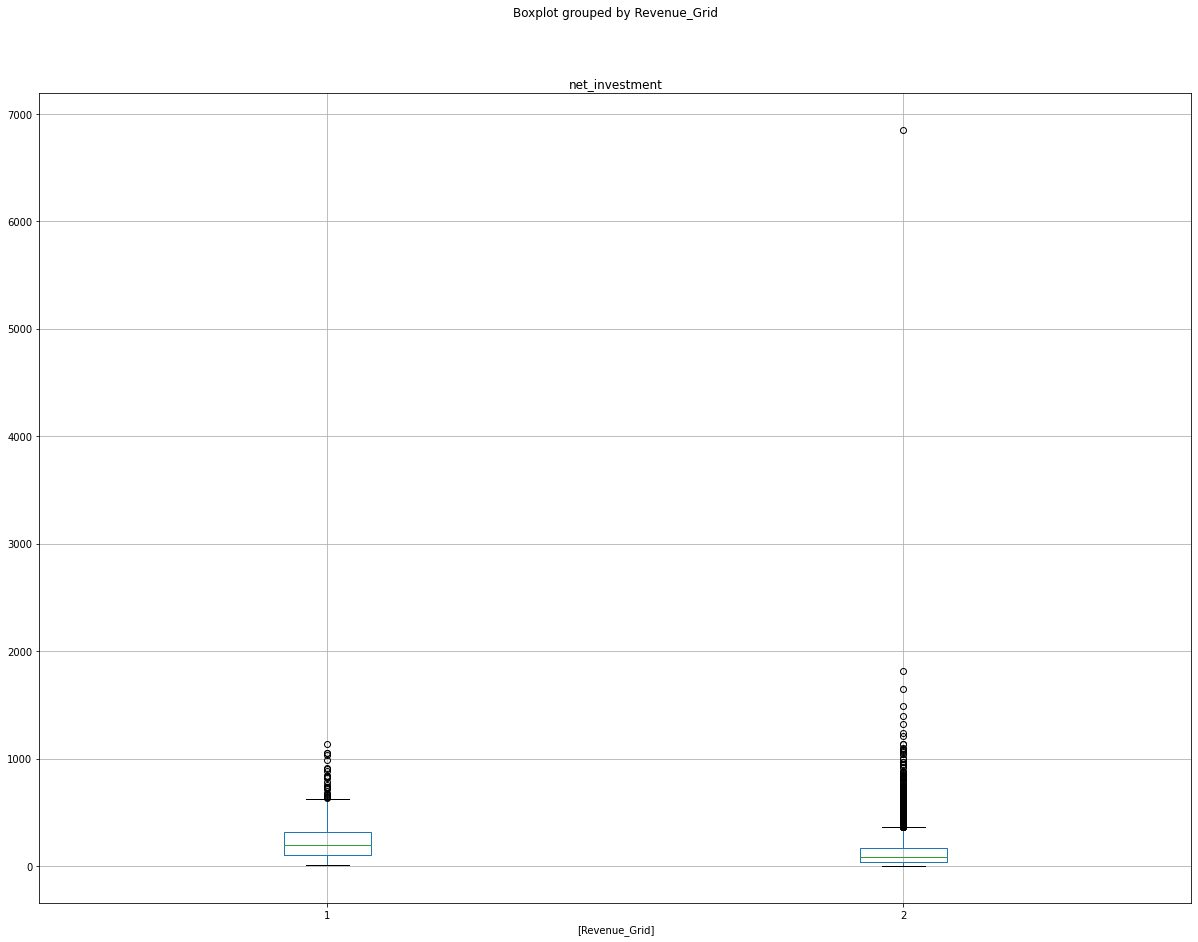

In [31]:
#find columns with more number of zeros that dont count for the analysis.this step is done to get the balance in the data set.choosing columns in grid 2 that dont much account for analysis will help us to bring balance
for col_list in mylist:
  findzeros(col_list)
  drawboxplot(col_list)


In [32]:

data_zero=data_customer[data_customer[mylist].eq(0).any(1)]
data_zero.groupby('Revenue_Grid').count()


#all the money related columns are zero and they belong to grid 2 and can be dropped


,age_band,occupation,occupation_partner,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,net_investment
Revenue_Grid,,,,,,,,,,,,,,,,,,,,,
1,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766,766
2,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762,6762


In [33]:
my_modifiedlist=['Investment_Tax_Saving_Bond','Average_Credit_Card_Transaction','Term_Deposit','Medical_Insurance']

In [34]:
data_modzero=data_customer[data_customer[my_modifiedlist].eq(0).any(1)]
data_modzero.groupby('Revenue_Grid').count()

,age_band,occupation,occupation_partner,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,net_investment
Revenue_Grid,,,,,,,,,,,,,,,,,,,,,
1,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668,668
2,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349,6349


In [35]:
index = data_customer[((data_customer['Investment_Tax_Saving_Bond'] == 0)|
                      (data_customer['Average_Credit_Card_Transaction'] == 0)|
                      (data_customer['Term_Deposit']==0)&
                      (data_customer['Medical_Insurance']==0))&
                      (data_customer['Revenue_Grid']==2)] .index
                       
data_customer.drop(index, inplace = True)

In [36]:
index_outlier=data_customer[(data_customer['net_investment']>500)&(data_customer['Revenue_Grid']==2)].index
data_customer.drop(index_outlier,inplace=True)

In [37]:
data_customer.loc[data_customer['gender'] == 'Unknown', ['gender']] = data_customer['gender'].mode()[0]
data_customer.loc[data_customer['occupation'] == 'Other', ['occupation']] = data_customer['occupation'].mode()[0]
data_customer['gender'].value_counts()
data_customer['occupation'].value_counts()

Professional         639
Retired              358
Secretarial/Admin    315
Housewife            219
Business Manager     147
Manual Worker        115
Student               10
Name: occupation, dtype: int64

In [38]:
data_customerfinal=data_customer.copy(deep=True)

In [39]:
data_customer['Revenue_Grid'].value_counts()

2    943
1    860
Name: Revenue_Grid, dtype: int64

In [40]:
data_customerfinal.drop(columns=['occupation_partner','net_investment','Portfolio_Balance'],inplace=True)

correlations between categorical and continuos
point biserial
correlations between cat and cat 
Chi-square test
– Cramer’s V
– Bonferroni correction

In [41]:
stats.pointbiserialr(data_customer['Revenue_Grid'],data_customer['Investment_in_Commudity'])

PointbiserialrResult(correlation=-0.002418299568289024, pvalue=0.9182692022013572)

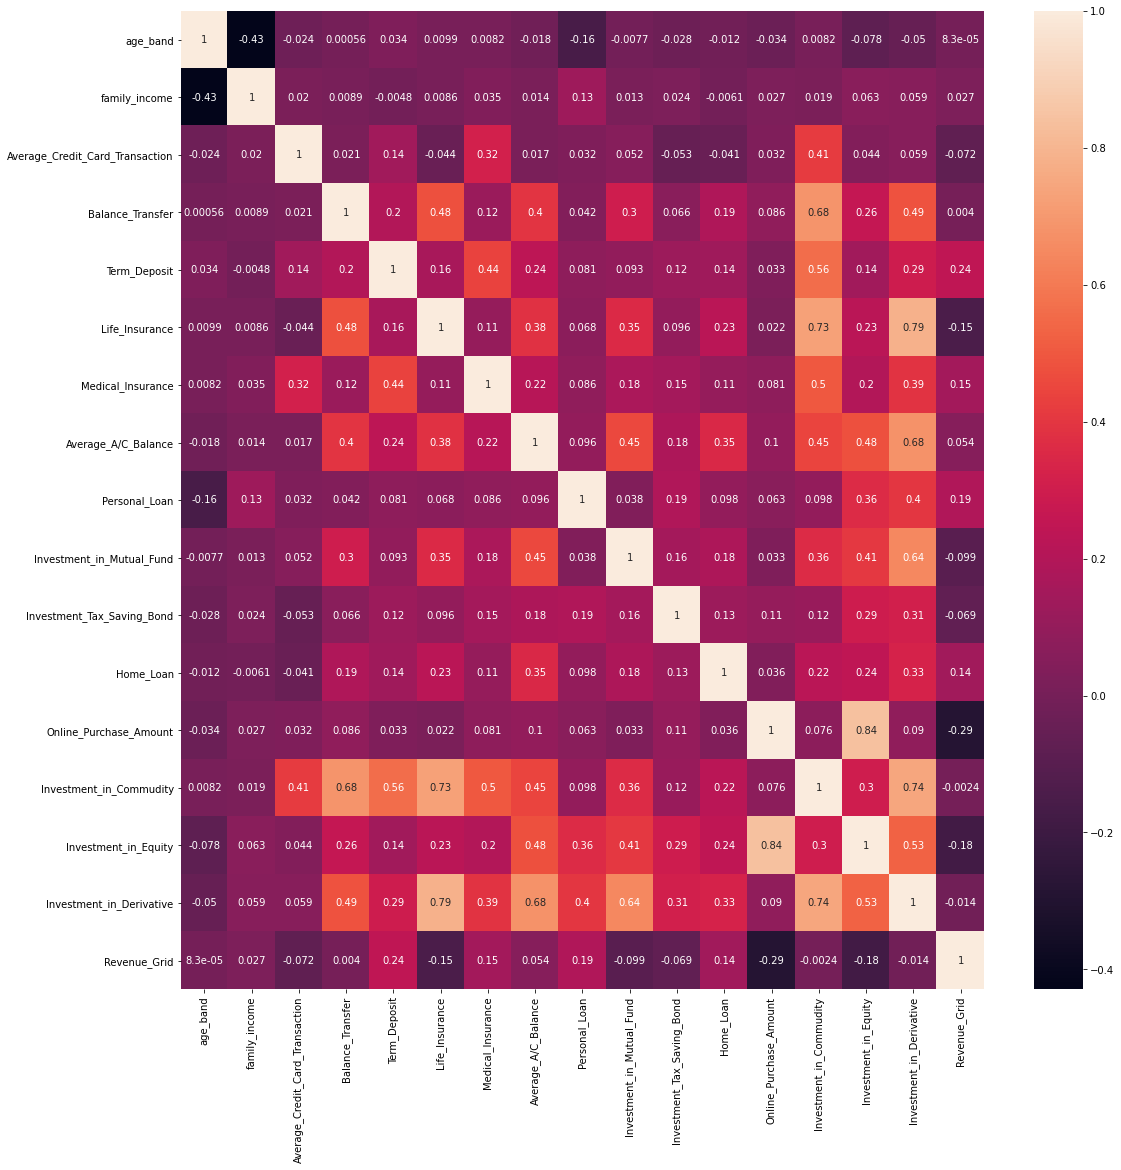

In [42]:
corr= data_customerfinal.corr()
top_features =corr.index
plt.figure(figsize=(18,18))
sns.heatmap(data_customerfinal[top_features].corr(), annot=True)

In [43]:
profile = ProfileReport(data_customer) 
profile.to_file(output_file = 'Post Profiling Report_networth classification.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


Logistic regression assumptions
The logistic regression method assumes that:

The outcome is a binary or dichotomous variable like yes vs no, positive vs negative, 1 vs 0.
There is a linear relationship between the logit of the outcome and each predictor variables. Recall that the logit function is logit(p) = log(p/(1-p)), where p is the probabilities of the outcome (see Chapter @ref(logistic-regression)).
There is no influential values (extreme values or outliers) in the continuous predictors
There is no high intercorrelations (i.e. multicollinearity) among the predictors.

In [44]:
data_customerfinal.info()

data_customer['Revenue_Grid'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 6892 to 8267
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         1803 non-null   float64
 1   occupation                       1803 non-null   object 
 2   family_income                    1803 non-null   float64
 3   Average_Credit_Card_Transaction  1803 non-null   float64
 4   Balance_Transfer                 1803 non-null   float64
 5   Term_Deposit                     1803 non-null   float64
 6   Life_Insurance                   1803 non-null   float64
 7   Medical_Insurance                1803 non-null   float64
 8   Average_A/C_Balance              1803 non-null   float64
 9   Personal_Loan                    1803 non-null   float64
 10  Investment_in_Mutual_Fund        1803 non-null   float64
 11  Investment_Tax_Saving_Bond       1803 non-null   float64
 12  Home_Loan        

array([1, 2])

0.4769828064337216

0.5230171935662784

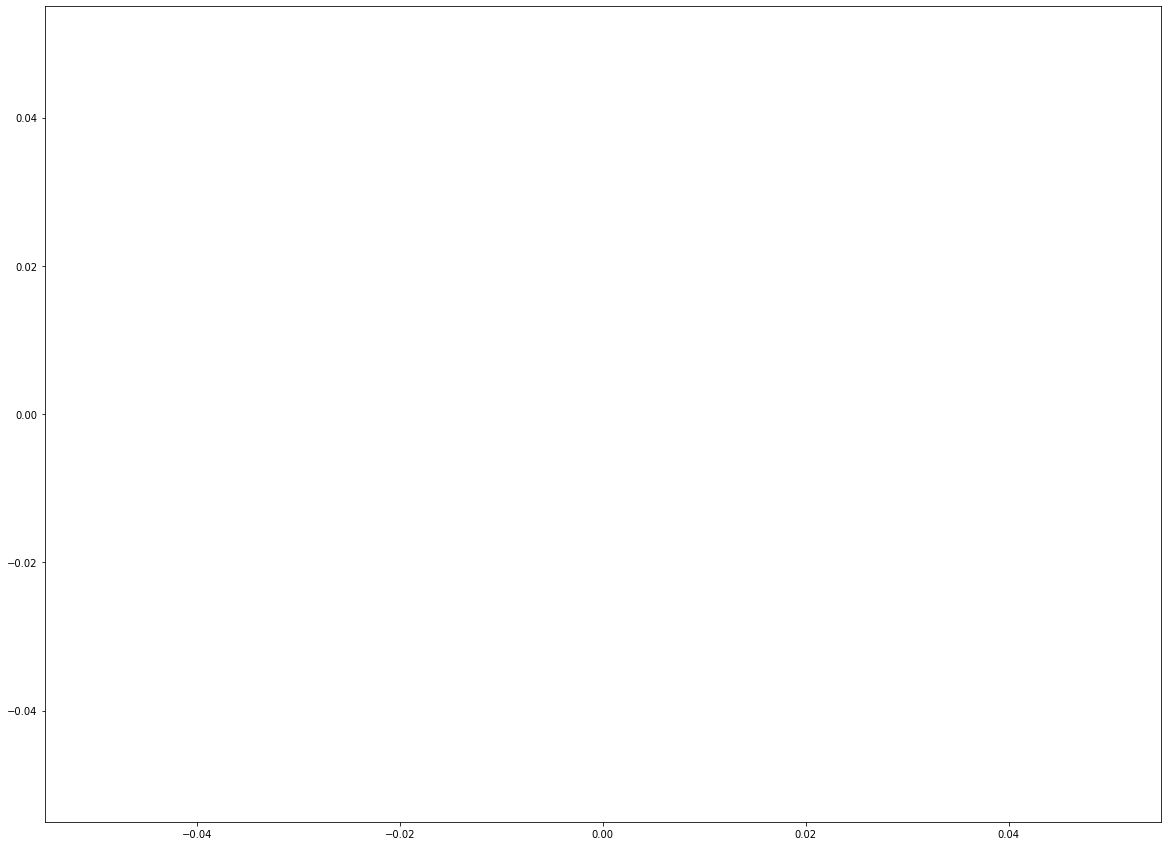

ValueError: ignored

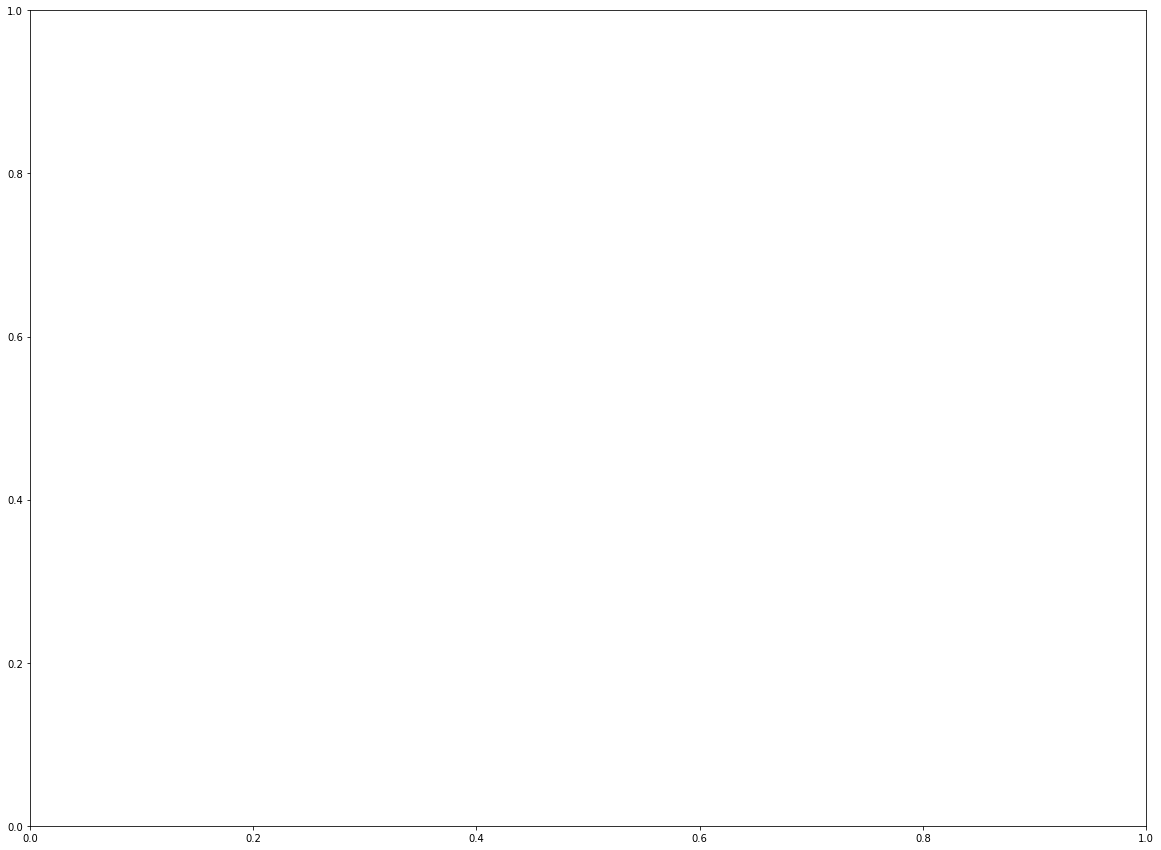

In [45]:
from scipy.special import logit
from statsmodels.nonparametric.smoothers_lowess import lowess

data_customerfinal['Revenue_Grid']=data_customerfinal['Revenue_Grid'].astype(float)
probof1 =(data_customerfinal['Revenue_Grid']==1).mean()
probof2 =(data_customerfinal['Revenue_Grid']==2).mean()
display(probof1,probof2)

#data_customerfinal['Revenue_Grid']=data_customerfinal['Revenue_Grid'].apply(lambda x:probof1 if (x==1) else probof2)

  



x=logit(data_customerfinal['Revenue_Grid'])
y=data_customerfinal['Balance_Transfer']
plt.scatter(y,x)
plt.show()
ys = lowess(y, x)
_=plt.plot(ys,x,'red',linewidth=1)

display(data_customerfinal.head())

In [46]:
#one hot encoding on occupation and gender
encoded_data = pd.get_dummies(data_customerfinal, drop_first=True) 


encoded_data.head()


,age_band,family_income,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Revenue_Grid,occupation_Housewife,occupation_Manual Worker,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,gender_Male
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,
6892,67.50000,28750.00000,0.00000,29.99000,0.00000,406.72000,0.00000,62.89000,0.00000,98.05000,2.00000,0.00000,0.00000,87.34000,27.16000,94.94000,1.00000,0,0,0,1,0,0,1
10031,47.50000,26250.00000,9.49000,0.01000,0.00000,81.88000,0.00000,25.96000,111.89000,41.47000,16.95000,4.48000,149.99000,18.28000,58.46000,46.36000,1.00000,0,0,1,0,0,0,0
2756,67.50000,6000.00000,280.44000,0.00000,27.99000,62.45000,56.46000,146.93000,14.49000,0.00000,0.00000,0.00000,305.46000,85.47000,77.81000,46.72000,1.00000,0,0,1,0,0,0,0
10124,38.00000,26250.00000,0.00000,0.01000,0.00000,49.98000,0.00000,49.91000,45.45000,0.00000,9.98000,0.00000,528.78000,10.00000,105.69000,25.89000,1.00000,0,0,0,0,0,1,0
10430,47.50000,21250.00000,23.48000,0.00000,0.00000,0.00000,40.47000,0.00000,80.96000,0.00000,1.00000,0.00000,0.00000,12.79000,13.66000,20.41000,2.00000,0,0,1,0,0,0,0


In [ ]:
corr= encoded_data.corr()
top_features =corr.index
plt.figure(figsize=(18,18))
sns.heatmap(encoded_data[top_features].corr(), annot=True)

Data Preparation

Now we will split our data in training and testing part for further development.

In [47]:
X = encoded_data.drop('Revenue_Grid',axis = 1)
y = encoded_data['Revenue_Grid']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, stratify = y)

print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (1622, 23) (1622,)
Testing Data Shape: (181, 23) (181,)



8. Model Development & Evaluation

In this section we will develop Logistic Regression using input features and tune our model if required.
Then we will analyze the results obtained and make our observation.
For evaluation purpose we will focus on Accuracy, also we will check for Precision, Recall, F1-Score, Roc-Auc-Curve and Precision-Recall Score.

8.1 Logistic Regression - Baseline Model

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

8.2 Using Trained Model for Prediction

In [50]:
#predicting on train data
y_pred_train = logreg.predict(X_train)

#predicting on test data
y_pred_test = logreg.predict(X_test)
y_pred_test

array([1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 2., 1., 1., 1., 1., 2., 2., 1.,
       1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 1., 1., 1., 2., 1., 1.,
       1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 2.,
       2., 2., 2., 2., 1., 1., 1., 2., 2., 1., 1., 2., 1., 2., 1., 2., 2.,
       2., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1.,
       2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1., 2., 2.,
       1., 1., 2., 2., 2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 2., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2.,
       1., 1., 1., 1., 2., 1., 2., 1., 2., 2., 2., 1., 2., 1., 1., 1., 2.,
       2., 2., 1., 2., 1., 2., 2., 2., 2., 1., 2.])

8.3 Logistic Regression Model Evaluation

### Checking Confusion Matrix
- A __confusion matrix__ is a __summary__ of prediction results on a classification problem.

- The **number of correct and incorrect predictions** are summarized with count values and **broken down by each class**. <br/>
Below is a diagram showing a general confusion matrix.

<center><img src="https://raw.githubusercontent.com/insaid2018/Term-2/master/images/confusion%20total%20matrix.png" width="500" height="300" /></center>



- **True Positive (TP)** : Observation is positive, and is predicted to be positive.
- **False Negative (FN)** : Observation is positive, but is predicted negative.
- **True Negative (TN)** : Observation is negative, and is predicted to be negative.
- **False Positive (FP)** : Observation is negative, but is predicted positive.

In [51]:
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test))
confusion_matrix.index = ['Actual 1','Actual 2']
confusion_matrix.columns = ['Predicted 1','Predicted 2']
print(confusion_matrix)

          Predicted 1  Predicted 2
Actual 1           76           10
Actual 2           13           82


In [52]:
pred = logreg.predict(X_test)
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8729281767955801


In [53]:
print('Precision score for test data is:', precision_score(y_test,y_pred_test))

Precision score for test data is: 0.8539325842696629


In [54]:
print('Recall score for test data is:',  recall_score(y_test,y_pred_test))

Recall score for test data is: 0.8837209302325582


In [55]:
print('f1 score for test data is:', f1_score(y_test,y_pred_test))

f1 score for test data is: 0.8685714285714285


In [206]:
data_test=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/existing_base_test.csv",index_col=0) 

print('Data Shape:',data_test.shape)
display(data_test.head(10))

Data Shape: (2031, 30)


,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,year_last_moved,TVarea,post_code,post_area,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
REF_NO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,1973,Meridian,BH21 2JQ,BH21,41.98000,55.47000,24.99000,29.98000,49.98000,44.47000,0.00000,45.97000,0.00000,0.00000,0.00000,Male,South West,40.48000,15.07000,28.40000,83.05000
7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,1996,Anglia,CM6 3QS,CM6,0.00000,0.00000,0.00000,99.91000,35.42000,29.49000,170.31000,133.88000,27.45000,13.47000,57.46000,Male,South East,27.07000,72.01000,82.74000,235.29000
4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,1958,HTV,BA12 9JW,BA12,0.00000,154.47000,0.00000,67.47000,0.00000,87.83000,0.00000,107.88000,0.00000,0.00000,0.00000,Female,South West,44.39000,32.62000,43.86000,98.38000
6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,1993,Grampian,AB22 8SP,AB22,18.98000,60.98000,0.00000,17.99000,9.99000,0.00000,102.43000,44.96000,0.00000,0.00000,0.00000,Female,Scotland,21.59000,24.57000,29.23000,86.32000
2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,1976,Meridian,PO37 6AD,PO37,0.00000,144.90000,0.00000,123.38000,0.00000,32.98000,0.00000,33.96000,6.99000,17.93000,5.45000,Female,South East,53.66000,16.22000,32.89000,102.99000
7367,1,36-40,Partner,Secretarial/Admin,Professional,Own Home,"<22,500, >=20,000",No,No,1989,Tyne Tees,DH7 8UZ,DH7,0.00000,24.48000,29.99000,99.42000,0.00000,112.38000,199.31000,67.43000,0.00000,5.47000,0.00000,Female,North,30.78000,64.10000,79.76000,132.74000
9598,Zero,51-55,Widowed,Secretarial/Admin,Unknown,Own Home,"<20,000, >=17,500",No,No,1995,Yorkshire,YO14 0DN,YO14,0.00000,0.00000,24.99000,0.00000,0.00000,0.00000,0.00000,0.00000,5.98000,0.00000,0.00000,Female,Unknown,5.00000,1.00000,1.00000,6.55000
6704,2,36-40,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1978,Yorkshire,BD20 8BY,BD20,145.48000,30.00000,14.99000,124.96000,29.47000,18.48000,37.95000,43.98000,3.00000,0.00000,0.00000,Female,Unknown,68.98000,17.24000,42.97000,154.46000
4933,3,31-35,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,1984,Granada,PR9 7JE,PR9,0.00000,0.51000,0.00000,0.01000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Female,North West,0.10000,0.00000,0.00000,22.35000


In [207]:
data_test.drop(columns=['children','status','occupation_partner','home_status','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','region','Portfolio_Balance'],inplace=True)

In [208]:
data_test['age_band'].value_counts()

45-50      261
36-40      239
31-35      221
51-55      219
41-45      209
26-30      192
55-60      182
61-65      181
65-70      130
22-25      100
71+         73
18-21       13
Unknown     11
Name: age_band, dtype: int64

In [210]:
data_test['family_income'].value_counts()

>=35,000             503
<27,500, >=25,000    258
<30,000, >=27,500    198
<25,000, >=22,500    177
<20,000, >=17,500    158
<12,500, >=10,000    142
<15,000, >=12,500    121
<17,500, >=15,000    113
<22,500, >=20,000    111
<10,000, >= 8,000    111
< 8,000, >= 4,000     74
< 4,000               45
Unknown               20
Name: family_income, dtype: int64

In [211]:
data_test.head()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 697 to 5208
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   object 
 1   occupation                       2031 non-null   object 
 2   family_income                    2031 non-null   object 
 3   Average_Credit_Card_Transaction  2031 non-null   float64
 4   Balance_Transfer                 2031 non-null   float64
 5   Term_Deposit                     2031 non-null   float64
 6   Life_Insurance                   2031 non-null   float64
 7   Medical_Insurance                2031 non-null   float64
 8   Average_A/C_Balance              2031 non-null   float64
 9   Personal_Loan                    2031 non-null   float64
 10  Investment_in_Mutual_Fund        2031 non-null   float64
 11  Investment_Tax_Saving_Bond       2031 non-null   float64
 12  Home_Loan         

In [212]:
data_test['age_band'].replace('Unknown',np.nan,regex=False,inplace=True)
data_test['age_band'].replace('71+','71-75',regex=False,inplace=True)
data_test.fillna(method='ffill',inplace=True)

new = data_test['age_band'].str.split('-', n = 1, expand = True)
new=new.astype(int)


new['age']=(new[0]+new[1])/2

data_test['age_band']= new['age'].values
data_test['age_band'].value_counts()


47.50000    264
38.00000    239
33.00000    224
53.00000    220
43.00000    210
28.00000    192
57.50000    184
63.00000    182
67.50000    130
23.50000    100
73.00000     73
19.50000     13
Name: age_band, dtype: int64

In [213]:
data_test['family_income'].replace('>=35,000','35000 35000',regex=True,inplace=True )
data_test['family_income'].replace('< 4,000','4000, 4000',regex=True,inplace=True)
data_test['family_income'].replace('>= ','',regex=True,inplace=True)
data_test['family_income'].replace('< ','',regex=True,inplace=True)
data_test['family_income'].replace('>=',' ',regex=True,inplace=True)
data_test['family_income'].replace('<','',regex=True,inplace=True)
data_test['family_income'].replace(',','',regex=True,inplace=True)
data_test['family_income'].replace('Unknown',np.nan,regex=True,inplace=True)
data_test['family_income'].ffill(inplace=True)

income = data_test['family_income'].str.split(' ', n = 1, expand = True)

income[0].str.strip()
income[1].str.strip()
income=income.astype(float)
income['final']=(income[0]+income[1])/2
data_test['family_income']=income['final'].values

In [214]:
display(data_test['occupation'].mode()[0])
data_test.loc[data_test['occupation'] == 'Unknown',['occupation']] = data_test['occupation'].mode()[0]
data_test.loc[data_test['occupation'] == 'Other', ['occupation']] = data_test['occupation'].mode()[0]

'Professional'

In [215]:

data_test.loc[data_test['gender'] == 'Unknown', ['gender']] = data_test['gender'].mode()[0]
data_test['gender'].value_counts()

Female    1532
Male       499
Name: gender, dtype: int64

In [216]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 697 to 5208
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   float64
 1   occupation                       2031 non-null   object 
 2   family_income                    2031 non-null   float64
 3   Average_Credit_Card_Transaction  2031 non-null   float64
 4   Balance_Transfer                 2031 non-null   float64
 5   Term_Deposit                     2031 non-null   float64
 6   Life_Insurance                   2031 non-null   float64
 7   Medical_Insurance                2031 non-null   float64
 8   Average_A/C_Balance              2031 non-null   float64
 9   Personal_Loan                    2031 non-null   float64
 10  Investment_in_Mutual_Fund        2031 non-null   float64
 11  Investment_Tax_Saving_Bond       2031 non-null   float64
 12  Home_Loan         

In [217]:
test_encoded=pd.get_dummies(data_test)
test_encoded.drop(columns=['gender_Female','occupation_Business Manager'],inplace=True)


In [218]:
test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2031 entries, 697 to 5208
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         2031 non-null   float64
 1   family_income                    2031 non-null   float64
 2   Average_Credit_Card_Transaction  2031 non-null   float64
 3   Balance_Transfer                 2031 non-null   float64
 4   Term_Deposit                     2031 non-null   float64
 5   Life_Insurance                   2031 non-null   float64
 6   Medical_Insurance                2031 non-null   float64
 7   Average_A/C_Balance              2031 non-null   float64
 8   Personal_Loan                    2031 non-null   float64
 9   Investment_in_Mutual_Fund        2031 non-null   float64
 10  Investment_Tax_Saving_Bond       2031 non-null   float64
 11  Home_Loan                        2031 non-null   float64
 12  Online_Purchase_Am

In [219]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1803 entries, 6892 to 8267
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age_band                         1803 non-null   float64
 1   family_income                    1803 non-null   float64
 2   Average_Credit_Card_Transaction  1803 non-null   float64
 3   Balance_Transfer                 1803 non-null   float64
 4   Term_Deposit                     1803 non-null   float64
 5   Life_Insurance                   1803 non-null   float64
 6   Medical_Insurance                1803 non-null   float64
 7   Average_A/C_Balance              1803 non-null   float64
 8   Personal_Loan                    1803 non-null   float64
 9   Investment_in_Mutual_Fund        1803 non-null   float64
 10  Investment_Tax_Saving_Bond       1803 non-null   float64
 11  Home_Loan                        1803 non-null   float64
 12  Online_Purchase_A

In [220]:
X=test_encoded

In [221]:
y_pred_test = logreg.predict(X)
X.head()
test_encoded['Revenue_Grid']=y_pred_test
test_encoded=test_encoded.filter(['Revenue_Grid'])

In [222]:
test_encoded.head()

,Revenue_Grid
REF_NO,
697,2.00000
7897,2.00000
4729,2.00000
6914,2.00000
2795,2.00000


In [224]:
test_encoded.to_csv('submissionv_revenuegrid.csv',index=False, header=False)